### **SkillFactory**
### **Курс** Специализация Data Science

## <center> Дипломный проект. Часть 1

# <center> «Модель прогнозирования
# <center> стоимости жилья для агентства недвижимости»
___

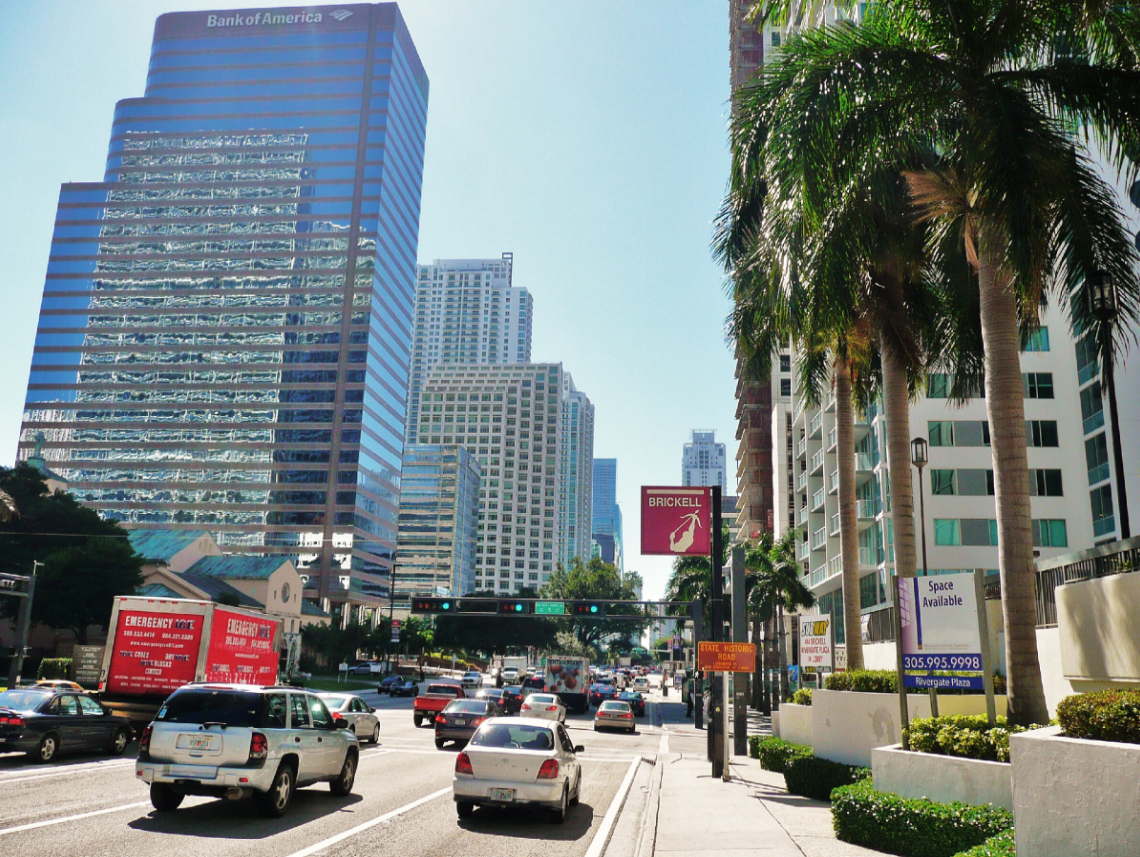

    
## 1. Постановка задачи

**Ваша задача** — разработать модель, которая позволила бы агентству
недвижимости обойти конкурентов по скорости и качеству совершения
сделок.

Вам необходимо:
1. Провести разведывательный анализ и очистку исходных данных. Обратите внимание, что данные в таблице реальные: в результате во многих признаках присутствуют ублирующиеся категории, ошибки ввода, жаргонные сокращения и т.д. Вам предстоит отыскать закономерности, самостоятельно расшифровать все сокращения, найти синонимы в данных, обработать пропуски и удалить выбросы. Постарайтесь уделить этапу очистки максимум внимания, так как это напрямую повлияет на результаты моделирования. 

2. Выделить наиболее значимые факторы, влияющие на стоимость недвижимости.

3. Построить модель для прогнозирования стоимости недвижимости.

4. Разработать небольшой веб-сервис, на вход которому поступают данные о некоторой выставленной на продажу недвижимости, а сервис прогнозирует его стоимость.

**Описание данных:**
* 'status' — статус продажи;
* 'private pool' и 'PrivatePool' — наличие собственного бассейна;
* 'propertyType' — тип объекта недвижимости;
* 'street' — адрес объекта;
* 'baths' — количество ванных комнат;
* 'homeFacts' — сведения о строительстве объекта (содержит несколько
типов сведений, влияющих на оценку объекта);
* 'fireplace' — наличие камина;
* 'city' — город;
* 'schools' — сведения о школах в районе;
* 'sqft' — площадь в футах;
* 'zipcode' — почтовый индекс;
* 'beds' — количество спален;
* 'state' — штат;
* 'stories' — количество этажей;
* 'mls-id' и 'MlsId' — идентификатор MLS (Multiple Listing Service, система
мультилистинга);
* 'target' — цена объекта недвижимости (целевой признак, который
необходимо спрогнозировать).




___

## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными.
Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [180]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Прочитаем наш файл с исходными данными:

In [181]:
house_data = pd.read_csv("data/data.csv")
data = house_data.copy()
print(f"Размер таблицы : {data.shape}")
data.head()

Размер таблицы : (377185, 18)


status private pool        propertyType               street    baths  \
0    Active          NaN  Single Family Home       240 Heather Ln      3.5   
1  for sale          NaN  single-family home    12911 E Heroy Ave  3 Baths   
2  for sale          NaN  single-family home    2005 Westridge Rd  2 Baths   
3  for sale          NaN  single-family home  4311 Livingston Ave  8 Baths   
4  for sale          NaN            lot/land       1524 Kiscoe St      NaN   

                                           homeFacts fireplace  \
0  {'atAGlanceFacts': [{'factValue': '2019', 'fac...  Gas Logs   
1  {'atAGlanceFacts': [{'factValue': '2019', 'fac...       NaN   
2  {'atAGlanceFacts': [{'factValue': '1961', 'fac...       yes   
3  {'atAGlanceFacts': [{'factValue': '2006', 'fac...       yes   
4  {'atAGlanceFacts': [{'factValue': '', 'factLab...       NaN   

             city                                            schools  \
0  Southern Pines  [{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...   
1  Spokane Valley  [{'rating': ['4/10', 'None/10', '4/10'], 'data...   
2     Los Angeles  [{'rating': ['8/10', '4/10', '8/10'], 'data': ...   
3          Dallas  [{'rating': ['9/10', '9/10', '10/10', '9/10'],...   
4        Palm Bay  [{'rating': ['4/10', '5/10', '5/10'], 'data': ...   

         sqft zipcode    beds state stories mls-id PrivatePool       MlsId  \
0        2900   28387       4    NC     NaN    NaN         NaN      611019   
1  1,947 sqft   99216  3 Beds    WA     2.0    NaN         NaN   201916904   
2  3,000 sqft   90049  3 Beds    CA     1.0    NaN         yes  FR19221027   
3  6,457 sqft   75205  5 Beds    TX     3.0    NaN         NaN    14191809   
4         NaN   32908     NaN    FL     NaN    NaN         NaN      861745   

       target  
0    $418,000  
1    $310,000  
2  $2,895,000  
3  $2,395,000  
4      $5,000

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

Условно разделим признаки на нескольких групп:

**Данные об объекте:**
* 'propertyType' — тип объекта недвижимости;
* 'sqft' — площадь в футах;
* 'baths' — количество ванных комнат;
* 'beds' — количество спален;
* 'fireplace' — наличие камина;
* 'private pool' и 'PrivatePool' — наличие собственного бассейна;
* 'stories' — количество этажей;
* 'homeFacts' — сведения о строительстве объекта (содержит несколько типов сведений, влияющих на оценку объекта);

**Инфраструктурные характеристики:**
* 'schools' — сведения о школах в районе;

**Географическая информация:**
* 'street' — адрес объекта;
* 'city' — город;
* 'zipcode' — почтовый индекс;
* 'state' — штат;

**Прочие признаки:**
* 'status' — статус продажи;
* 'mls-id' и 'MlsId' — идентификатор MLS (Multiple Listing Service, система мультилистинга);

**Целевой признак:**
* 'target' — цена объекта недвижимости (целевой признак, который необходимо спрогнозировать).

Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

Посмотрим на пропуски

In [183]:
cols_null_percent = (data.isnull().mean() * 100).sort_values(ascending=False)
cols_null_percent

private pool    98.891525
mls-id          93.387330
PrivatePool     89.312672
fireplace       72.661956
stories         39.957846
baths           28.192532
beds            24.200856
MlsId           17.731352
sqft            10.757851
status          10.583136
propertyType     9.208479
target           0.657767
city             0.009014
street           0.000530
zipcode          0.000000
schools          0.000000
state            0.000000
homeFacts        0.000000
dtype: float64

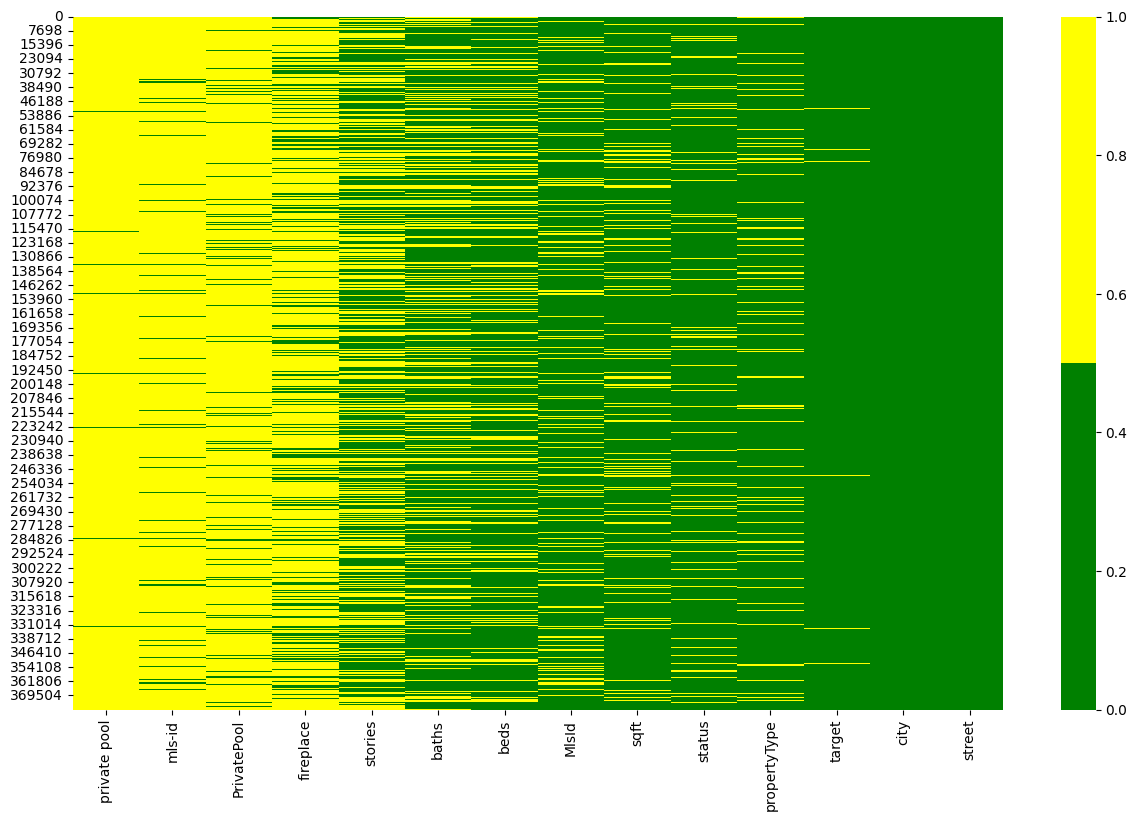

In [184]:
# Отберём только колонки с пропусками
cols_with_null = cols_null_percent[cols_null_percent > 0]

# Визуализируем пропуски в данных
colors = ['green', 'yellow'] 
fig = plt.figure(figsize=(15, 9))
cols = cols_with_null.index
ax = sns.heatmap(
    data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

Пропуски по большей части расположены хаотично, явной закономерности выявить не удалось.

Столбцы *private pool, PrivatePool, mls-id, fireplace* содержат от 73-99% пропусков, поэтому будут удалены. 
В первую очередь удалим пропуски в целевой переменной.

In [185]:
print(f"Размер таблицы до удаления объектов: {data.shape}")

# Удалим строки с пропусками целевой переменной
data = data.dropna(subset='target')

print(f"Размер таблицы после удаления объектов: {data.shape}")

Размер таблицы до удаления объектов: (377185, 18)
Размер таблицы после удаления объектов: (374704, 18)


___

### <center> **2.1 Данные об объекте**

#### 2.1.1 fireplace, private pool и PrivatePool

Признаки *fireplace*, *private pool* и *PrivatePool* сожержат более 70% пропусков, удалим их.

In [186]:
# Удалим столбцы fireplace, private pool и PrivatePool
data = data.drop(['private pool', 'PrivatePool', 'fireplace'], axis=1)

print(f"Размер таблицы после удаления объектов: {data.shape}")

Размер таблицы после удаления объектов: (374704, 15)


#### 2.1.2 propertyType

Посмотрим на уникальные категории признака.

In [187]:
# Приведём данные столбца к нижнему регистру
data['propertyType'] = data['propertyType'].str.lower()

# Посмотрим на уникальные значения и их количество
display(data['propertyType'].value_counts().head(60))
print(f"Количество уникальных значений: {data['propertyType'].nunique()}")
print(f"Количество пропущенных значений: {data['propertyType'].isna().sum()}")

single-family home                      91376
single family                           61888
condo                                   42372
single family home                      31725
lot/land                                20532
townhouse                               18352
land                                    10933
multi-family                             7895
condo/townhome/row home/co-op            7701
traditional                              5912
coop                                     3265
multi family                             2772
high rise                                1823
ranch                                    1781
detached, one story                      1614
mobile/manufactured                      1613
single detached, traditional             1581
contemporary                             1556
multi-family home                        1501
1 story                                  1235
colonial                                 1204
mobile / manufactured             

Количество уникальных значений: 1271
Количество пропущенных значений: 34554


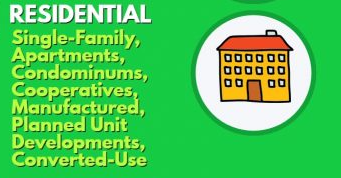

Выделим следующие типы недвижимости:

* **Дома на одну семью (single family)** могут включать отдельно стоящие или коттеджные дома, например, таунхаусы. Дома на одну семью, пожалуй, являются наиболее широко используемыми и популярными типами жилья в сфере недвижимости.

* **Многоквартирные дома (apartment)** или апартаменты обычно расположены в городских районах и пригородных зонах. Редко можно увидеть что-либо, напоминающее многоквартирный дом в сельской местности. В этих зданиях также могут быть предусмотрены охрана, прачечная самообслуживания, парковка, бассейн, фитнес-клуб и поле для гольфа. Многие инвесторы любят многоквартирные дома из-за их ограничений по риску, отсутствия конкуренции и простоты управления. Но для таких видов инвестиций в недвижимость обычно требуется больший капитал.

> *В описании к теме проекта "apartment — съёмная квартира (нельзя купить)", но, как показал анализ, только несколько объектов этого типа недвижимости сдаются, поэтому апартменты в наших данных - это многоквартирные дома (c классификацией по типам недаижимости в США можно ознакомиться [здесь](https://www.biggerinvesting.com/6-types-of-real-property-infographic-real-estate-investing/#What_is_Land))*

* **Кондоминиум (condominium)** – это форма совместного владения жилым комплексом, объединяющая жильцов для управления, эксплуатации и содержания всех его объектов.
В объединении под названием «кондоминиум» квартира является частной собственностью владельца, а общие территории (парадные, лифты, прачечные, холлы, бассейны, спа, теннисные корты, прилегающие зоны и т. д.) находятся в совместном владении всех жильцов.

* **Кооператив (cooperative)** – это уникальный тип домовладения, поскольку, когда инвестор приобретает недвижимость, становится акционером корпорации, владеющей недвижимостью. Каждый акционер имеет право занимать одну единицу жилья в соответствии с акционерным соглашением. Это объединение членов кооператива, которое получает преимущества в покупательной способности за счет снижения стоимости услуг членов и технического обслуживания.

* **Мобильные дома (manufactured/mobil home)** производятся полностью на заводе, доставляются на объект и устанавливаются. Эти дома возводятся под наблюдением и управлением министерства жилищного строительства и городского развития США (HUD). До 15 июня 1976 года эти типы домов были известны как передвижные дома. Стоимость этих домов может быть относительно низкой из-за их конвейерного строительства на заводах, а исполнение в современной стилистике с просторными помещениями делают эти типы домов более привлекательными для покупателей. Существенный минус этих домов в том, что они зачастую не имеют своего земельного участка, а устанавливаются на арендуемых площадях.

* **Пентхаус (penthouse)** — отдельное жилье на верхнем этаже (или нескольких этажах) многоэтажного дома, который имеет собственную террасу. Структура пентхауса создаёт эффект изолированного от окружающей среды собственного жилья, виллы, особняка в плотно застроенных центрах больших городов или городских агломераций. Кроме террасы пентхаус также может быть оборудован «зимним садом», бассейном, и так далее.

> *Не смотря на то, что пентхаус можно отнести к апартаментам по типу, всё же они являются более дорогостоящим жильём в этой категории, поэтому вынесла этот тип недвижимости, как отдельную категорию.*

* **Участки земли (lot/land)**
* **Земля** (*вероятно, для сельскохозяйственных нужд*)

Получим новый признак, содержащий информацию о типе недвижимости.

In [188]:
# Получим новый признак, содержащий информацию о типе недвижимости
def get_property_type(property_type):
    if 'manuf' in property_type or 'mobil' in property_type or 'mfd' in property_type or 'prefab' in property_type or 'mo2' in property_type:
            return 'manufactured/mobil home'
    elif ('single' in property_type or 'detached' in property_type) and 'single level' not in property_type:
        return 'single family'
    elif 'condo' in property_type: 
        return 'condominium'
    elif 'co-op' in property_type or 'coop' in property_type or 'cooperative' in property_type: 
        return 'cooperative'
    elif 'penthouse' in property_type: 
        return 'penthouse'
    elif property_type == 'land': 
        return 'land'
    elif property_type == 'lot/land': 
        return 'lot/land'
    elif 'multi-family' in property_type or 'multi family' in property_type  or 'multiplex' in property_type or 'multiple occupancy' in property_type or 'apartment' in property_type:
        return 'apartment'
    else:
        return 'other'

data['property_type'] = data[~data['propertyType'].isna()]['propertyType'].apply(get_property_type)

print(data['property_type'].value_counts(normalize=True))

single family              0.561470
condominium                0.150869
other                      0.134220
lot/land                   0.060362
apartment                  0.038777
land                       0.032142
cooperative                0.011283
manufactured/mobil home    0.010484
penthouse                  0.000394
Name: property_type, dtype: float64


Получим новый признак, содержащий информацию о архитектурных стилях объектов недвижимости.

In [189]:
# # Получим новый признак, содержащий информацию о архитектурных стилях объектов недвижимости
# def get_property_style(property_type):
#     if 'cape' in property_type:
#         return 'cape cod'
#     elif 'colonial' in property_type: 
#         return 'colonial home'
#     elif 'mediterranean' in property_type: 
#         return 'mediterranean'
#     elif 'farmhouse' in property_type:
#         return 'farmhouse'
#     elif 'ranch' in property_type: 
#         return 'ranch'
#     elif 'tudor' in property_type: 
#         return 'tudor'
#     elif 'victorian' in property_type: 
#         return 'victorian'
#     elif 'century' in property_type:
#         return 'mid-century modern'
#     elif 'loft' in property_type: 
#         return 'loft'
#     elif 'contemporary/modern' in property_type or 'contemporary' in property_type or 'modern' in property_type: 
#         return 'contemporary/modern'
#     elif 'traditional' in property_type: 
#         return 'traditional'
#     else:
#         return 'other'

# data['property style'] = data['propertyType'].apply(get_property_style)

# data['property style'].value_counts(normalize=True).head(50)

Признак property style получился неинформативным, т.к. немногим более 5% объектов имеют информацию об архитектурном стиле, поэтому для предсказания цены он не понадобится.

#### 2.1.3 sqft

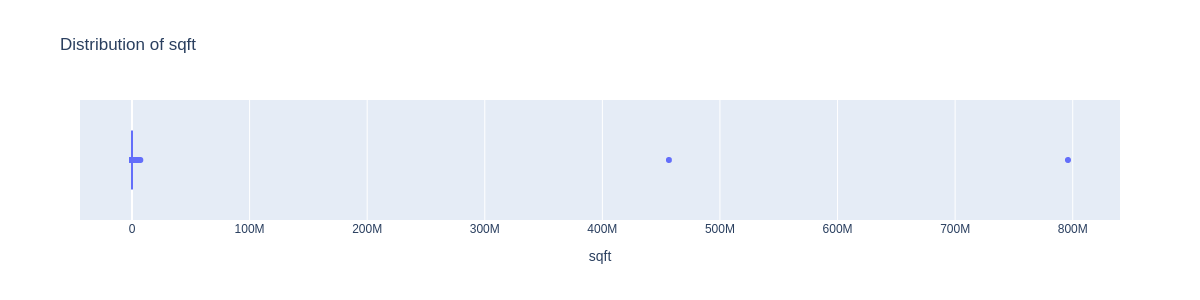

In [190]:
# Избавимся от всех символов, которые не являются цифрами.
data['sqft'] = data['sqft'].str.replace('\D+', '', regex=True)
data['sqft'] = data['sqft'].apply(lambda x: np.NaN if x == '' else x).astype(float)

# Посмотрим на распределение площади объектов недвижимости
fig = px.box(
    data,
    x='sqft',
    #color="",
    title="Distribution of sqft",
    width=1200,
    height=300,
)

# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_1.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

Удалим 2 явных выброса - квартира и дом с площадями (456602479.0, 795979430.0 $фут^2$), превыщающими размеры самых больших земельных участков в данных. Посмотрим на получившееся распределение.

(374702, 16)


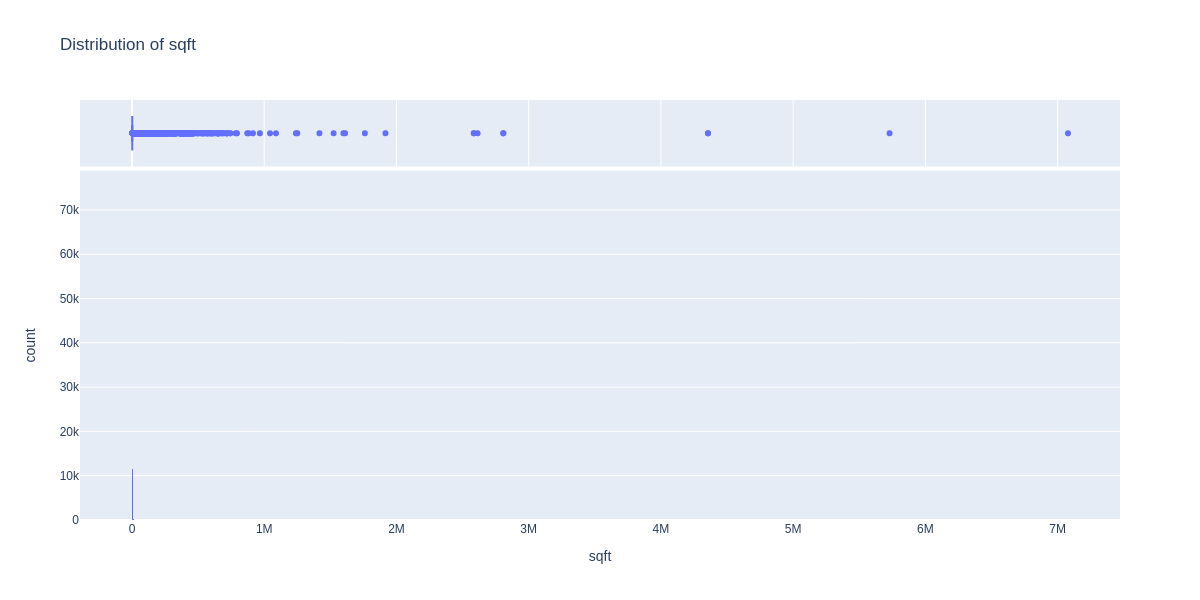

In [191]:
# Удалим явные выбросы
data = data[(data['sqft'] != 456602479.0) & (data['sqft'] != 795979430.0)]
print(data.shape)

# Посмотрим на распределение площади объектов недвижимости
fig = px.histogram(
    data,
    x='sqft',
    #color="",
    title="Distribution of sqft",
    width=1200,
    height=600,
    #color_discrete_sequence=["red", "blue"],
    #nbins=20,
    marginal='box',  
    #histnorm='percent' 
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_2.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

Распределение имеет сильную правосторонню асимметрию. Прологарифмируем признак.

Число выбросов по методу z-отклонения: 12130
Результирующее число записей: 321639
Верхняя граница поиска выбросов по методу z-отклонения: 13
Нижняя граница поиска выбросов по методу z-отклонения: 5


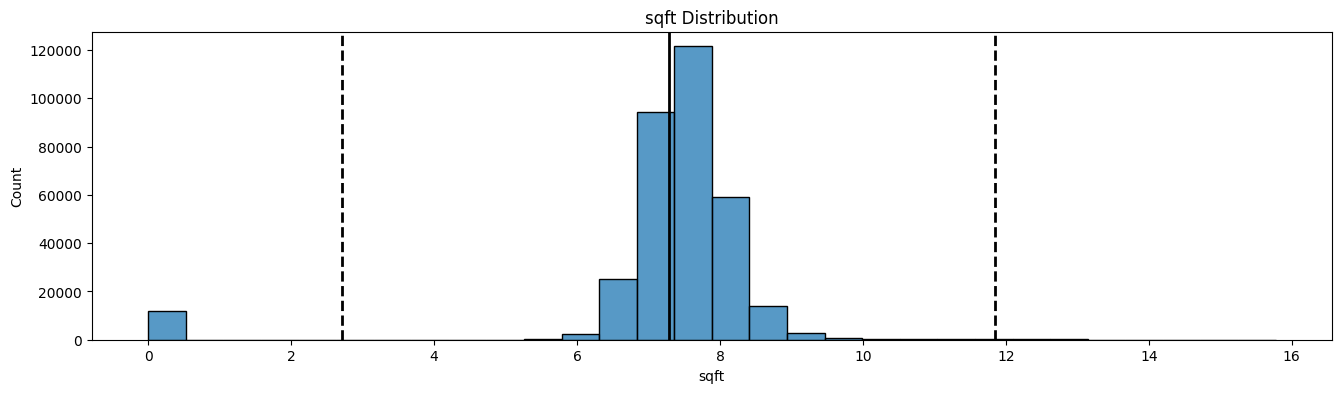

In [192]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
log_feature = np.log(data['sqft'] + 1)
histplot = sns.histplot(log_feature, bins=30, ax=ax)
histplot.axvline(log_feature.mean(), color='k', lw=2)
histplot.axvline(log_feature.mean() + 3 * log_feature.std(), color='k', ls='--', lw=2)
histplot.axvline(log_feature.mean() - 3 * log_feature.std(), color='k', ls='--', lw=2)
histplot.set_title('sqft Distribution');

# Реализуем алгоритм метода z-отклонения
def outliers_z_score_mod(data, feature, log_scale=True, left = 3,  right = 3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned, lower_bound, upper_bound

# Применим эту функцию признаку sqft, а также выведем размерности результатов:
outliers, cleaned, lower_bound, upper_bound  = outliers_z_score_mod(data, 'sqft', left=1.2,  right=3.8)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
print(f'Верхняя граница поиска выбросов по методу z-отклонения: {round(upper_bound)}')
print(f'Нижняя граница поиска выбросов по методу z-отклонения: {round(lower_bound)}')

#data = data[(data['sqft'] > 86) & (data['sqft'] <= cleaned['sqft'].max())]

Метод Z-отклонений отсекает участки, соответствующие малогабаритному жилью и земельным участкам. Вполне распространена практика аренды малогабаритного жилья, например, в Нью-Йорке можно арендовать жильё от 8 $m^2$ (от 86 $фут^2$). Поэтому вернёмся к заполнению пропусков и очистке выбросов позже, в разрезе других признаков.

#### 2.1.4 baths

Посмотрим на уникальные категории признака.

In [193]:
display(data['baths'].value_counts().head(60))
display(data['baths'].unique())

print(f"Количество пропущенных значений: {data['baths'].isna().sum()}")


2 Baths         52079
3 Baths         35396
2               20429
2.0             16355
4 Baths         14724
3.0             10797
3               10093
Bathrooms: 2     9411
2.5              8113
Bathrooms: 3     6569
1                6569
1.0              5799
5 Baths          5367
4.0              4559
2.5 Baths        4448
0                3811
4                3561
3.5              3455
Bathrooms: 1     3126
2 ba             2679
6 Baths          2600
Bathrooms: 4     2372
1,500            2207
3 ba             1884
1.5              1857
3.5 Baths        1818
2,000            1792
1,750            1720
3,000            1684
5.0              1551
2,250            1440
1,000            1279
5                1219
7 Baths          1210
1,250            1203
4.5              1016
2,750             964
2,500             894
Bathrooms: 5      823
~                 780
1 ba              747
4 ba              735
6.0               733
3,500             653
8 Baths           638
6         

array(['3.5', '3 Baths', '2 Baths', '8 Baths', nan, '2', '3',
       'Bathrooms: 2', '1,750', '4 Baths', '2 ba', 'Bathrooms: 5',
       '1,000', '7 Baths', '2.0', '3.0', 'Bathrooms: 1', '4.0',
       '2.1 Baths', '2.5 Baths', '1', 'Bathrooms: 3', '4.5', '6 Baths',
       'Bathrooms: 4', '3 ba', '5', '2,500', '5.5 Baths', '1.0',
       '5 Baths', '1.5', '4', '~', '2.5', '4,000', '3.5 Baths', '2,000',
       '3,000', '8.0', '1 ba', '0', '5.0', '1,500', '7.0', '1,250',
       '9 Baths', '2,250', '6.0', '12 Baths', '5.5', '3,500', '1.5 Baths',
       '2,750', 'Bathrooms: 6', '4.5 Baths', '750', '5.5+', '6',
       '10 Baths', '6 ba', 'Bathrooms: 19', '10.0', '4 ba', '12 ba',
       '2.5+', '8', '7.5+', 'Bathrooms: 10', '0 / 0', 'Sq. Ft. ', '5 ba',
       '4.5+', '18 Baths', '-- baths', 'Bathrooms: 7', '7', '18', '3.5+',
       '1.5+', '11 Baths', '5,000', '1.75 Baths', '9', '12.0', '6.5',
       'Bathrooms: 8', '10', '19 Baths', 'Bathrooms: 9', '16 Baths',
       '13 Baths', 'Bathrooms: 13

Количество пропущенных значений: 105375


Количество ванных комнат в США, как правило, обозначаются десятичными дробями, например: 
* 1,25 - полностью оборудованная ванная комната плюс вторая ванная комната, состоящая только из туалета;
* 1,5 - полностью оборудованная ванная комната плюс вторая ванная с туалетом и раковиной, их сочетание часто называют "дамской комнатой";
* 0,75 - полностью оборудованная ванная комната плюс вторая ванная в которой нет ванны, только душевая кабина, унитаз и раковина.

Учтём эту особенность.

Cреди значений числа ванных комнат найдено странное, 750. Гипотеза, что это значение 0,75  (ванная каомната с душевой, унитазом и раковиной, но без ванны), не подтвердилась, т.к. объекты либо имеют больше 2 спален, либо высокую стоимость, поэтому заменим это значение на NAN.

In [194]:
# Заменим непонятные по смыслу значения, содержащие цифры на пустые элементы.
replacement = {
    '2-1 / 2-1 / 1-1 / 1-1': '',
    '1 / 1-0 / 1-0 / 1-0': '',
    '1 / 1 / 1 / 1': '',
    '3-1 / 2-2': '',
    'Bathrooms: 241': '',
    '1-0 / 1-0 / 1': '',
    '116 / 116 / 116': '',
}

data['baths'] = data['baths'].replace(replacement, regex=True)

# Извлечём все цифры из текста и преобразуем в тип float
#p = r'([\d]*[.][\d]+|[\d]+)' # включая числа с точкой
p = r'([\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+)' # включая числа с точкой и запятой
data['baths'] = data['baths'].str.extract(p).replace(',', '.', regex=True).astype(float)
# Все значения не кратные 0,25 заменим на NAN
data['baths'] = data['baths'].apply(lambda x: x if x%0.25 == 0 else np.NAN)

# Присвоим объектам НЕ типа lot/land и land c количеством ванных комнат 0 категорию NaN
data.loc[(data['baths'] == 0) & (data['property_type'] != 'lot/land') & (data['property_type'] != 'land'), 'baths'] = np.NaN
# Присвоим объектам c количеством ванных комнат 750 категорию NaN
#data[data['baths'] == 750]['beds'].value_counts()
data.loc[data['baths'] == 750, 'baths'] = np.NaN

# Присвоим объектам типа lot/land и land c количеством ванных комнат NaN категорию 0
data.loc[(data['baths'].isna()) & ((data['property_type'] == 'lot/land') | (data['property_type'] == 'land')), 'baths'] = 0

display(data['baths'].value_counts().head(60))
print(f"Количество уникальных значений: {data['baths'].nunique()}")
print(f"Количество пропущенных значений: {data['baths'].isna().sum()}")

2.00     102750
3.00      66425
0.00      30864
4.00      26240
1.00      17521
2.50      13747
5.00       9438
3.50       6152
1.50       4347
6.00       4293
7.00       2075
1.75       1812
4.50       1559
2.25       1457
1.25       1210
8.00       1158
2.75        998
9.00        545
5.50        522
10.00       328
6.50        193
11.00       186
12.00       134
7.50         84
13.00        74
16.00        52
14.00        45
18.00        32
8.50         31
15.00        28
24.00        17
20.00        15
10.50        14
3.25         10
22.00        10
17.00        10
26.00         8
23.00         8
3.75          8
30.00         6
9.50          6
27.00         5
40.00         4
21.00         4
12.50         4
19.00         3
11.50         3
32.00         3
36.00         3
44.00         3
29.00         2
28.00         2
4.25          2
0.75          2
34.00         2
25.00         1
35.00         1
6.75          1
60.00         1
42.00         1
Name: baths, dtype: int64

Количество уникальных значений: 71
Количество пропущенных значений: 80232


#### 2.1.5 beds

Посмотрим на уникальные категории

In [195]:
display(data['beds'].value_counts().head(60))
data['beds'].isna().sum()

3 Beds         53077
4 Beds         35225
3              31191
2 Beds         26195
4              19915
2              15998
Baths          15258
3 bd           12678
5 Beds         11227
4 bd            8193
3.0             8085
5               6392
4.0             5231
2 bd            5166
1               4583
6 Beds          3791
5 bd            2619
2.0             2429
6               1792
5.0             1372
0               1208
7 Beds          1098
1 bd            1068
-- bd            845
8 Beds           754
Bath             737
6 bd             643
7                510
1.0              429
                 350
9 Beds           345
8                316
6.0              311
0.0              223
10 Beds          175
7 bd             145
12 Beds          130
-- sqft           94
9                 94
8 bd              94
5,000 sqft        90
11 Beds           84
7.0               67
10                66
1 acre            46
64 Beds           44
8.0               41
16 Beds      

90955

In [196]:
data['beds'] = data['beds'].str.lower()

# Заменим некорректные значения на np.NaN
data.loc[data['beds'].str.contains('acres', na=False), 'beds'] = np.NaN
data.loc[data['beds'].str.contains('bedrooms', na=False), 'beds'] = np.NaN
data.loc[data['beds'].str.contains('sqft', na=False), 'beds'] = np.NaN

# Извлечём все цифры из текста и преобразуем в тип float
#p = r'([\d]*[.][\d]+|[\d]+)' # включая числа с точкой
p = r'([\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+)' # включая числа с точкой и запятой
data['beds'] = data['beds'].str.extract(p).replace(',', '', regex=True).astype(float)

# Заменим некорректные значения (выбросы) на np.NaN 
tresh_beds_list = data['beds'].value_counts().sort_index(ascending=False).head(3).index
data['beds'] = data['beds'].apply(lambda x: np.NaN if x in tresh_beds_list else x)

# Присвоим объектам НЕ типа lot/land и land c количеством спален 0 категорию NaN
data.loc[(data['beds'] == 0) & (data['property_type'] != 'lot/land') & (data['property_type'] != 'land'), 'beds'] = np.NaN

# Присвоим объектам типа lot/land и land c количеством спален NaN категорию 0
data.loc[(data['beds'].isna()) & ((data['property_type'] == 'lot/land') | (data['property_type'] == 'land')), 'beds'] = 0

display(data['beds'].value_counts())
display(data['beds'].unique())
print(f"Количество пропущенных значений: {data['beds'].isna().sum()}")

3.0     105031
4.0      68564
2.0      49788
0.0      29041
5.0      21610
6.0       6537
1.0       6127
7.0       1820
8.0       1205
9.0        483
10.0       273
12.0       186
11.0       133
16.0        68
13.0        48
64.0        44
14.0        43
15.0        33
18.0        31
24.0        30
20.0        19
17.0        12
32.0         9
28.0         9
26.0         8
22.0         8
34.0         6
19.0         6
27.0         5
23.0         5
21.0         5
40.0         4
30.0         4
25.0         3
44.0         3
36.0         3
48.0         2
42.0         2
29.0         2
78.0         2
33.0         2
47.0         2
99.0         1
53.0         1
51.0         1
31.0         1
75.0         1
39.0         1
52.0         1
46.0         1
76.0         1
35.0         1
88.0         1
Name: beds, dtype: int64

array([ 4.,  3.,  5.,  0.,  2., nan,  8.,  1.,  6., 12., 14.,  7.,  9.,
       16., 13., 10., 18., 20., 32., 11., 26., 64., 22., 24., 15., 28.,
       36., 19., 48., 25., 17., 27., 40., 47., 23., 44., 30., 33., 31.,
       34., 99., 78., 53., 51., 21., 75., 29., 39., 42., 52., 46., 76.,
       35., 88.])

Количество пропущенных значений: 83475


#### 2.1.6 stories

Посмотрим на уникальные категории.

In [197]:
display(data['stories'].value_counts().head(60))
display(data['stories'].unique())
print(f"Количество пропущенных значений: {data['stories'].isna().sum()}")

1.0                      66807
2.0                      55003
1                        22795
2                        17976
3.0                      11233
0.0                       7209
One                       5758
0                         4231
3                         4201
9.0                       2914
2.00                      2775
Two                       2495
4.0                       2136
2 Story                   1970
1 Story                   1253
1.00                      1200
4                          889
3+                         868
6.0                        716
1.50                       650
5.0                        614
Three Or More              569
3.00                       517
9                          467
One Story                  395
Lot                        365
Townhouse                  325
7.0                        312
Ranch/1 Story              293
6                          282
Multi/Split                271
8.0                        254
Two Stor

array([nan, '2.0', '1.0', '3.0', 'One', '2', 'Multi/Split', '4.0', '0.0',
       '0', 'One Level', '1', '9.0', '3', '1 Level, Site Built',
       'One Story', '3.00', '1.00', '14.0', 'Two', '3+', '1 Story', '5.0',
       '2 Story', 'Ranch/1 Story', 'Condominium', 'Stories/Levels', '7.0',
       '2 Level, Site Built', '2 Level', '15', '3 Level, Site Built', '4',
       '22.0', '2.00', '6.0', '1.0000', 'Lot', '3 Story', 'Three Or More',
       '1.5', '1 Level', 'Two Story or More', 'Site Built, Tri-Level',
       '54.0', '23', 'Farm House', '8.0', '16.0', '1.50', '18', '9', '21',
       '8', '12.0', 'Split Level w/ Sub', '11.0', '1.5 Stories', '7',
       '11', 'Townhouse', '12', '21.0', '16', '1.5 Story/Basement',
       '28.0', 'Traditional', '2.5 Story', '17', '2.0000', '63.0',
       'Acreage', 'Ground Level, One', '6', 'Split Foyer', '2 Stories',
       '27.0', '19.0', '2.50', '1.30', '2 Story/Basement', 'Split Level',
       '1.5 Story', '1.5 Level', '2 Or More Stories',
       '1 

Количество пропущенных значений: 149793


Оставим у признака *stories* 3 категории: **1** - 1 этаж и **2** - 2 и более этажей, **0** - нет постройки (участок/земля). В разрезе типа недвижимости этажность имеет значение, например, 1-й этаж для многоэтажки - это более дешёвый объект недвижимости (мало света, сырость), также в больших городах близ автомобильных трасс из-за загрязнённости воздуха лучше выбирать квартиру, расположенную выше 7 этажа.

In [198]:
data['stories'] = data['stories'].str.lower()

# Cписок принадлежности обекта к категории 1 этаж
one_level_list = ['one', 'ground', 'ranch', 'bungalow']
# Cписок принадлежности обекта к категории 2 этажa и более
multi_level_list = ['stories', 'multi', 'split', 'more', 'double', 'rise', 'half', 'two', 'tri', 'three', 'four', 'six', 'raised', 'bi']
# Cписок принадлежности обекта к категории земля, участок
no_level_list = ['acreage']

# Присвоим объектам новые категории согласно спискам
for item in multi_level_list:
    data.loc[data['stories'].str.contains(item, na=False), 'stories'] = 2

for item in one_level_list:
    data.loc[data['stories'].str.contains(item, na=False), 'stories'] = 1

for item in no_level_list:
    data.loc[data['stories'].str.contains(item, na=False), 'stories'] = 0
    
# Извлечём все цифры из текста и преобразуем в тип float
#p = r'([\d]*[.][\d]+|[\d]+)' # включая числа с точкой
p = r'([\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+)' # включая числа с точкой и запятой
data['stories'] = data['stories'].str.extract(p).replace(',', '', regex=True).astype(float)

# Присвоим объектам c этажностью больше 1 категорию 2, c этажностью 0 - NAN
data.loc[data['stories'] > 1, 'stories'] = 2
data.loc[data['stories'] == 0, 'stories'] = np.NaN

# Присвоим объектам типа lot/land и land c этажностью NaN категорию 0
data.loc[((data['stories'].isna()) & (data['property_type'] == 'lot/land')) | ((data['stories'].isna()) & (data['property_type'] == 'land')), 'stories'] = 0

display(data['stories'].value_counts().head(60))
display(data['stories'].unique())
print(f"Количество пропущенных значений: {data['stories'].isna().sum()}")

2.0    108046
1.0     92640
0.0     29514
Name: stories, dtype: int64

array([nan,  2.,  1.,  0.])

Количество пропущенных значений: 144502


Проверим, осталась ли этажность ***0*** у объектов не категории земля или земельный участок.

In [199]:
data[data['stories'] == 0]['property_type'].value_counts()

lot/land    18592
land        10922
Name: property_type, dtype: int64

Число пропущенных значений в признаке увеличилось, но пока не будем его удалять. Позже, после удаления дубликатов и строк с некорректными значениями вернёмся к этому признаку.

#### 2.1.7 homeFacts

Посмотрим на уникальные значения.

In [200]:
display(data['homeFacts'].value_counts().head(60))
print(f"Количество пропущенных значений: {data['homeFacts'].isna().sum()}")

data['homeFacts'] = data['homeFacts'].apply(eval)

{'atAGlanceFacts': [{'factValue': '', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '—', 'factLabel': 'lotsize'}, {'factValue': None, 'factLabel': 'Price/sqft'}]}                              7142
{'atAGlanceFacts': [{'factValue': None, 'factLabel': 'Year built'}, {'factValue': None, 'factLabel': 'Remodeled year'}, {'factValue': None, 'factLabel': 'Heating'}, {'factValue': None, 'factLabel': 'Cooling'}, {'factValue': None, 'factLabel': 'Parking'}, {'factValue': None, 'factLabel': 'lotsize'}, {'factValue': None, 'factLabel': 'Price/sqft'}]}                   3484
{'atAGlanceFacts': [{'factValue': '', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue

Количество пропущенных значений: 0


Создадим промежуточный признак ***year_built*** и ***year_built_category***

In [201]:
data['year_built'] = data['homeFacts'].apply(lambda x: x['atAGlanceFacts'][0]['factValue'])
display(data['year_built'].value_counts())
display(data['year_built'].unique())
print(f"Количество пропущенных значений: {data['year_built'].isna().sum()}")

        58521
2019    32142
2006     7954
2005     7449
2007     7096
        ...  
1740        1
1845        1
1208        1
1823        1
1804        1
Name: year_built, Length: 228, dtype: int64

array(['2019', '1961', '2006', '', '1920', '1976', '1970', '1965', '2015',
       '1996', '1982', '1905', '2008', '1899', '2016', '1954', '1989',
       '2014', '1915', '1994', '1910', '1923', '1960', '1977', '1972',
       '1963', '1981', '1949', '1930', '1991', '1958', '2005', '2017',
       '2018', '1983', '1928', '1998', '1997', '1964', '1974', '1940',
       '1973', '1968', '1999', '1918', '2007', '1984', '1946', '2003',
       '2000', '2004', '1969', '2002', '1952', '1947', '1957', '1978',
       '1956', '1967', '1975', '1988', '1955', '1950', '1959', '2012',
       '1924', '1966', '1992', '2001', '1995', '2010', '1971', '1909',
       '1953', '1993', '1990', '1980', '1985', '1951', '1907', '1885',
       '1941', '1927', '1929', '1901', None, '1922', '1906', '1945',
       '1979', '2009', '1962', '1913', '2011', '1897', '1987', '2020',
       '1926', '1939', '1925', '2013', '1986', 'No Data', '1943', '1935',
       '1890', '1895', '1911', '1948', '1942', '1916', '1900', '1931',
 

Количество пропущенных значений: 3565


Заменим  значение 'No Data' и '' на NAN.

Выделим следующие категории:

* **NaN** - отсутствующие значения и даты вне диапазона 1700 - 2021
* **no buildings** - участки земли без построек,
* **1700-1800** - 1700-1800,
* **1801-1900** - 1801-1900,
* **1901-1925** - 1901-1925,
* **1926-1950** - 1926-1950,
* **1951-1975** - 1951-1975,
* **1976-2000** - 1976-2000,
* **2001-2021** - 2001-2021 (год выгрузки базы данных для анализа).


In [202]:
# Заменим некорректные значения на NaN и изменим тип данных на float
data.loc[(data['year_built'] == 'No Data') | (data['year_built'] == ''), 'year_built'] = np.NAN
data['year_built'] = data['year_built'].astype(float)

# Заменим даты вне диапазона 1700 - 2021 на NAN
data.loc[(data['year_built'] < 1730) | (data['year_built'] > 2021), 'year_built'] = np.NAN

# Присвоим объектам типа lot/land и land c годом постройки NaN значение 0
data.loc[((data['year_built'].isna()) & (data['property_type'] == 'lot/land')) | ((data['year_built'].isna()) & (data['property_type'] == 'land')), 'year_built'] = 0

# Присвоим объектам категории в соответствии с годом постройки
def get_year_built_category(year_built):
    if year_built > 1699 and  year_built < 1801:
        return '1700-1800'
    elif year_built > 1800 and  year_built < 1901:
        return '1801-1900'
    elif year_built > 1900 and  year_built < 1926:
        return '1901-1925'
    elif year_built > 1925 and  year_built < 1951:
        return '1926-1950'
    elif year_built > 1950 and  year_built < 1976:
        return '1951-1975'
    elif year_built > 1975 and  year_built < 2001:
        return '1976-2000'
    elif year_built > 2000 and  year_built < 2026:
        return '2001-2025'
    elif year_built == 0:
        return 'no buildings'
    else:
        return np.NaN

data['year_built_category'] = data['year_built'].apply(get_year_built_category)

display(data['year_built_category'].value_counts())
print(f"Количество пропущенных значений: {data['year_built_category'].isna().sum()}")

2001-2025       114154
1976-2000        69249
1951-1975        65862
1926-1950        33162
no buildings     26972
1901-1925        22658
1801-1900         6283
1700-1800           46
Name: year_built_category, dtype: int64

Количество пропущенных значений: 36316


Создадим признак ***is_remodeled***.

In [203]:
data['is_remodeled'] = data['homeFacts'].apply(lambda x: x['atAGlanceFacts'][1]['factValue'])
display(data['is_remodeled'].value_counts().head(60))
display(data['is_remodeled'].unique())
print(f"Количество пропущенных значений: {data['is_remodeled'].isna().sum()}")

        198526
2006      5493
2005      4777
2007      4355
2008      3764
2004      3343
1980      3314
1970      3119
2000      3040
2003      2811
1985      2796
2002      2699
1975      2673
1990      2639
1965      2601
1983      2443
2001      2430
1995      2364
1988      2321
1962      2216
1978      2194
1981      2125
1998      2109
1960      2063
1999      2057
1982      2011
2014      1991
1972      1984
1984      1930
1996      1889
1974      1886
1950      1841
1979      1832
1989      1790
1993      1767
1997      1760
1986      1744
1973      1743
1987      1741
2010      1722
1994      1635
1955      1621
2009      1596
2013      1555
2012      1527
1977      1515
1968      1486
1992      1476
2015      1472
2019      1467
1991      1396
1971      1374
2016      1372
2018      1366
2011      1295
1976      1260
1969      1228
1940      1221
2017      1212
1920      1203
Name: is_remodeled, dtype: int64

array(['', '1967', '2006', None, '2015', '1997', '2019', '1982', '1905',
       '2009', '2007', '1996', '1995', '1988', '1972', '1949', '1954',
       '1930', '2003', '2000', '1994', '2005', '1983', '1965', '1968',
       '1993', '1999', '2014', '2008', '2010', '2004', '2002', '1952',
       '1978', '1975', '1971', '1947', '1957', '1950', '1973', '1970',
       '2016', '1989', '1998', '1980', '1955', '1991', '2011', '2017',
       '1986', '1941', '2001', '1990', '1979', '1901', '1984', '1918',
       '1977', '1962', '1956', '2013', '1960', '1981', '1969', '1987',
       '1958', '1910', '1925', '1964', '1966', '1992', '1943', '1961',
       '1948', '1931', '2012', '1976', '1974', '1935', '1940', '2018',
       '1916', '1914', '1963', '1985', '1951', '1944', '1942', '1959',
       '1927', '1946', '1945', '1920', '1938', '1936', '0', '1939',
       '1915', '1928', '1923', '1929', '1898', '1899', '1934', '1953',
       '1926', '1937', '1912', '1917', '1906', '1932', '1919', '1921',
       

Количество пропущенных значений: 26341


Предположим, что реконструктрукция производилась не ранее чем через 30 лет после строительства дома и не позднее года выгрузки данных (2021). Приведём данные к единообразию записи, где
* **0** - не было реконструкции (0 и ''),
* **1** - была реконструкция (даты в диапазоне 1730 - 2021)  ,
* **NAN** - не известно (отсутствующие значения и даты вне диапазона 1730 - 2021) .

In [204]:
# Заменим '' на 0 и приведём столбец к типу float 
data.loc[data['is_remodeled'] == '', 'is_remodeled'] = 0
data['is_remodeled'] = data['is_remodeled'].astype(float)


# Заменим даты не равные 0 и вне диапазона 1730 - 2021 на NAN
data.loc[(data['is_remodeled'] != 0) & ((data['is_remodeled'] < 1730) | (data['is_remodeled'] > 2021)), 'is_remodeled'] = np.NAN

# Заменим пропуски в относительно новых домах на 0
data.loc[(data['is_remodeled'].isna()) & (data['year_built'] > 1990), 'is_remodeled'] = 0

# Заменим даты в диапазоне 1730 - 2021 на 1
data.loc[(data['is_remodeled'] > 1729) & (data['is_remodeled'] < 2022), 'is_remodeled'] = 1

display(data['is_remodeled'].value_counts())
print(f"Количество пропущенных значений: {data['is_remodeled'].isna().sum()}")

0.0    212767
1.0    149565
Name: is_remodeled, dtype: int64

Количество пропущенных значений: 12370


Создадим признак *heating*.

In [205]:
data['heating'] = data['homeFacts'].apply(lambda x: x['atAGlanceFacts'][2]['factValue']).str.lower()
display(data['heating'].value_counts().head(60))
print(f"Количество пропущенных значений: {data['heating'].isna().sum()}")

forced air                               133479
                                         105165
other                                     29065
electric                                  10177
gas                                        9269
heat pump                                  8806
no data                                    8416
central air                                7814
central electric                           7112
central                                    6245
central, electric                          4252
baseboard                                  3771
wall                                       3277
electric heat                              3064
heating system                             2709
forced air, heat pump                      1764
radiant                                    1481
central air, ceiling fan(s)                1431
natural gas heat                           1383
central furnace                            1036
forced air, gas                         

Количество пропущенных значений: 3485


Система центрального отопления с приточно-вытяжной вентиляцией до данным [википедии](https://en.wikipedia.org/wiki/Forced-air) - это тип центрального отопления, наиболее часто устанавливаемый в Северной Америке. В этой системе в качестве теплоносителя используется воздух, а нагрев может происходить за счёт электричества, сгорания газа или другого вида топлива. Т.к. данные нельзя поделить на привычные нам центральное, газовое, электрическое и печное отопление, выделим следующие категории:
* **forced air**,
* **other**

In [206]:
# Выделим 2 категории и заполним пропуски единообразно
data.loc[(data['heating'].str.contains('forced', na=False)) | (data['heating'].str.contains('central air', na=False)), 'heating'] = 'forced air'
data.loc[(data['heating'] == ''), 'heating'] = np.NAN
data.loc[(data['heating'].notna()) & (data['heating'] != 'forced air'), 'heating'] = 'other'

display(data['heating'].value_counts())
print(f"Количество пропущенных значений: {data['heating'].isna().sum()}")

forced air    150486
other         115566
Name: heating, dtype: int64

Количество пропущенных значений: 108650


Создадим столбец ***cooling***.

Учитывая то, что центральные приточно-вытяжные системы не только отапливают помещения, но и охлаждают воздух в них, возможно после очистки признак *cooling* будет коррелировать с *heating*. Поэтому, предварительно, до преобразований, посмотрим на распределение значений *cooling* по категориям *heating*.

central                                                                        157638
                                                                               119589
central air                                                                     14382
no data                                                                         10396
has cooling                                                                      9729
                                                                                ...  
other (see remarks), panel/floor/wall, window unit                                  1
multi units, zoned cooling                                                          1
central air, g-energy star hvac, gas hot air/furnace, multizone a/c                 1
g-fresh air ventilation, gas hot air/furnace, heat pump - ac, multizone a/c         1
central a/c (gas), central heat (gas), heat pump                                    1
Name: cooling, Length: 1437, dtype: int64

Количество пропущенных значений: 3485


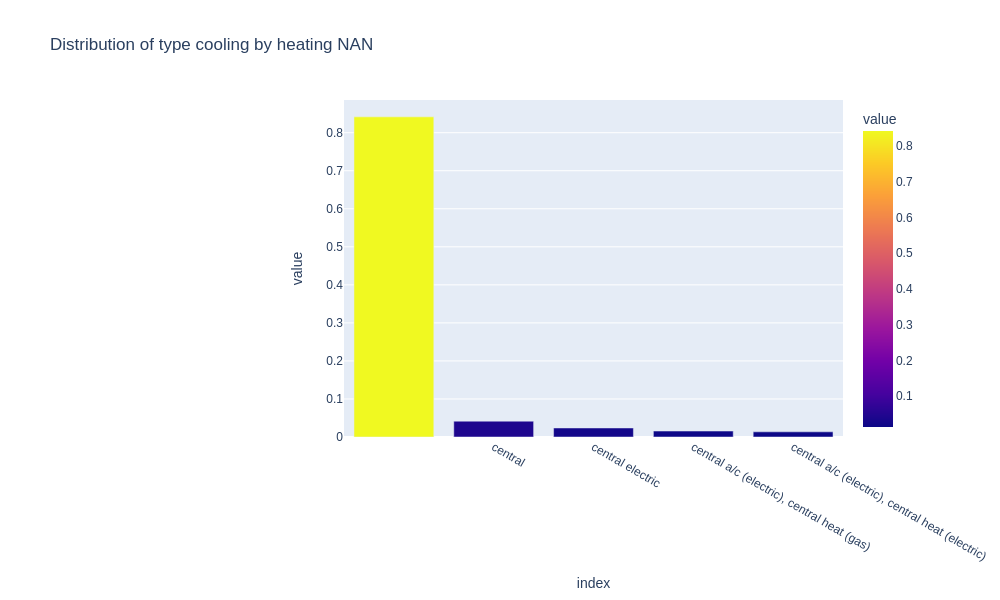

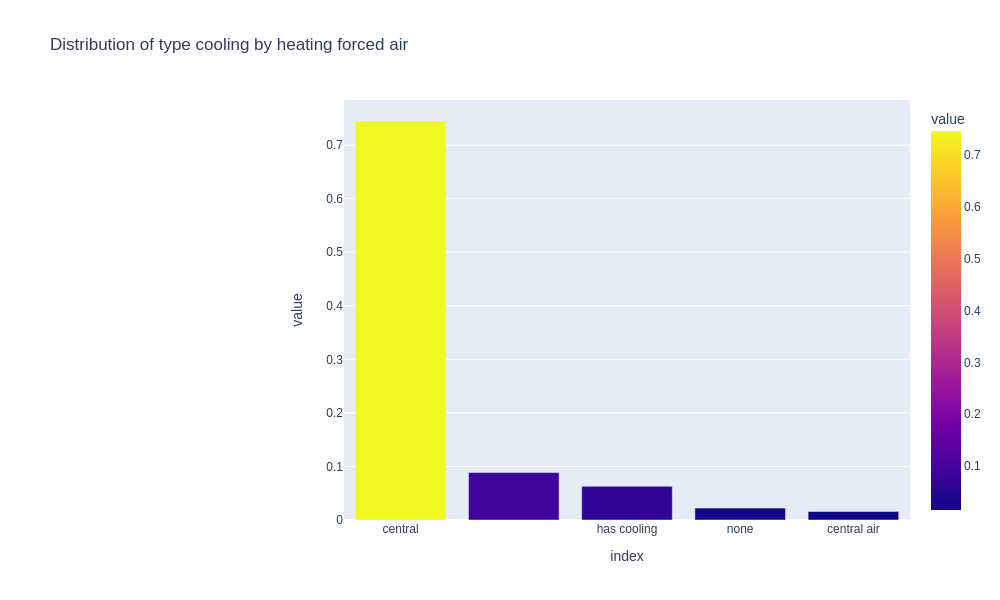

In [207]:
data['cooling'] = data['homeFacts'].apply(lambda x: x['atAGlanceFacts'][3]['factValue']).str.lower()
display(data['cooling'].value_counts())
print(f"Количество пропущенных значений: {data['cooling'].isna().sum()}")

fig = px.bar(
    data_frame=data[data['heating'].isna()]['cooling'].value_counts(normalize=True).head(),
    color='value',
    title='Distribution of type cooling by heating NAN',
    width=1000,
    height=600,
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_3.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

fig = px.bar(
    data_frame=data[data['heating'] == 'forced air']['cooling'].value_counts(normalize=True).head(),
    color='value',
    title='Distribution of type cooling by heating forced air',
    width=1000,
    height=600,
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_4.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

Как видно из графиков можно оставить только признак *heating*.

Создадим столбец ***parking***.

In [208]:
data['parking'] = data['homeFacts'].apply(lambda x: x['atAGlanceFacts'][4]['factValue']).str.lower()
display(data['parking'].value_counts(normalize=True))
print(f"Количество пропущенных значений: {data['parking'].isna().sum()}")

                                                                                                                                    0.460728
attached garage                                                                                                                     0.189226
2 spaces                                                                                                                            0.075069
1 space                                                                                                                             0.038007
detached garage                                                                                                                     0.035273
                                                                                                                                      ...   
assigned, open, under building                                                                                                      0.000003
assigned park

Количество пропущенных значений: 3485


Ещё до обработки понятно, что пропусков, включая неявные, в признаке *parking* много, около 50%. Не уверена в информативности этого признака, т.к. отдельно стоящие дома всегда имеют собственную парковку или гараж, каким бы он не был, отдельно стоящим, пристроенным, с навесом и т.д. Тем более, что чаcть значений отражают только информацию о типе парковки, но не о количестве мест и наоборот. Поэтому удалим этот признак, как неинформативный.

Создадим признак ***lot size***.

In [209]:
data['lot size'] = data['homeFacts'].apply(lambda x: x['atAGlanceFacts'][5]['factValue']).str.lower()
display(data['lot size'].value_counts().head(60))
print(f"Количество пропущенных значений: {data['lot size'].isna().sum()}")

                  32868
—                 25182
no data            5296
-- sqft lot        3813
0.26 acres         3110
0.25 acres         2702
0.28 acres         2603
0.27 acres         2450
0.29 acres         2331
0.34 acres         1927
0.31 acres         1709
0.32 acres         1568
6,098 sqft         1493
0.3 acres          1430
0.33 acres         1403
0.35 acres         1348
1 acre             1345
7,405 sqft         1323
0.46 acres         1284
6,534 sqft         1267
4,356 sqft         1252
10,000 sqft        1247
0.36 acres         1217
0.37 acres         1162
5,227 sqft         1157
5,000 sqft         1107
8,712 sqft         1008
0.38 acres          992
0.39 acres          979
3,920 sqft          978
8,276 sqft          957
0.41 acres          894
10019               858
0.5 acres           854
10,019 sqft         842
10000               834
0.42 acres          776
0.43 acres          768
0.44 acres          767
4,792 sqft          750
0.4 acres           741
9,583 sqft      

Количество пропущенных значений: 28203


In [210]:
data.shape

(374702, 23)

В столбце *lot size* присутствуют явные пропуски, заменим их на NAN. Значения площадей участков представлены в двух единицах измерения, в акрах и футах квадратных. Приведём все значения в квадратные футы.

In [211]:
# Cоздадим новый столбец для значений площади в квадратных футах
data['lot size sqft'] = data['lot size']
 
# Заменим неявные пропуски на NAN
data.loc[(data['lot size sqft'] == '—') | (data['lot size sqft'] == '-- sqft lot') 
         | (data['lot size sqft'] == 'no data') | (data['lot size sqft'] == ''), 'lot size sqft' ] = np.NaN

# Извлечём все цифры из текста и преобразуем в тип float
p = r'([\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+)' # включая числа с точкой и запятой
data['lot size sqft'] = data['lot size sqft'].str.extract(p).replace(',', '', regex=True).astype(float)

print(f"Размер таблицы до удаления объектов: {data.shape}")

# Удалим строки у которых некорректная запись в акрах (большая часть значений для такой огромной площади имеет слишком низкую стоимость)
data = data[~((data['lot size'].str.contains('acr', na=False)) & (data['lot size sqft'] >= 50))]

# Значения, измеренные в акрах из столбца lot size переведём в квадратные футы
data.loc[data['lot size'].str.contains('acr', na=False), 'lot size sqft'] = (data['lot size sqft'] * 43560).round()

display(data['lot size sqft'].value_counts().head(60))
print(f"Количество пропущенных значений: {data['lot size sqft'].isna().sum()}")
print(f"Размер таблицы после удаления объектов: {data.shape}")

Размер таблицы до удаления объектов: (374702, 24)


11326.0    3714
10890.0    3478
12197.0    3114
11761.0    2922
12632.0    2778
6098.0     2699
10000.0    2695
7405.0     2675
13068.0    2516
43560.0    2314
14810.0    2308
6534.0     2211
5000.0     2146
13504.0    2038
5227.0     1999
8712.0     1987
4356.0     1959
8276.0     1923
13939.0    1862
10019.0    1785
14375.0    1729
9583.0     1625
15246.0    1620
20038.0    1566
21780.0    1539
10454.0    1536
3920.0     1474
15682.0    1462
16117.0    1403
10018.0    1304
17424.0    1299
4791.0     1264
7500.0     1228
16553.0    1187
16988.0    1181
6969.0     1174
4792.0     1168
3049.0     1154
7840.0     1124
17860.0    1081
6000.0     1067
5662.0     1005
6970.0      974
2500.0      966
7841.0      964
2178.0      959
18731.0     947
19166.0     932
18295.0     931
7000.0      908
2000.0      901
871.0       883
1742.0      855
19602.0     847
5663.0      843
9147.0      809
20909.0     808
7501.0      798
20473.0     794
22651.0     779
Name: lot size sqft, dtype: int64

Количество пропущенных значений: 95362
Размер таблицы после удаления объектов: (374031, 24)


Признак *homeFacts* также содержит значения Price/sqft. Значения цен за квадратный фут нам не понадобятся, т.к. приведут к утечке данных из-за прямой зависимости с целевым признаком.

Удалим ненужные столбцы с данными об объекте. Признак *year_built* может пригодится при выявлении дубликатов, поэтому пока оставим его в наборе данных.

In [212]:
# Удалим ненужные столбцы 
data = data.drop(['propertyType', 'homeFacts', 'cooling', 'parking', 'lot size'], axis=1)

### <center> **2.2 Инфраструктурные характеристики**

#### 2.2.1 schools

In [213]:
display(data['schools'].value_counts().head(60))
print(f"Количество пропущенных значений: {data['schools'].isna().sum()}")

[{'rating': [], 'data': {'Distance': [], 'Grades': []}, 'name': []}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   4170
[{'rating': ['4/10', '5/10', '6/10'], 'data': {'Distance': ['39.69mi', '39.69mi', '39.69mi'], 'Grades': ['9-12', '6-8', 'PK-5']}, 'name': ['Fort Hancock High School', 'Fort Hancock Middle School', 'Benito Martinez Elementary School']}]                                                                                                                                                                                                                                 

Количество пропущенных значений: 0


Извлечем из признака *schools* информацию о количестве близжайших школ и и их среднем рейтинге.

Создадим новый признак ***num_of_schools*** - (количество школ).

In [214]:
data['schools'] = data['schools'].apply(eval)

data['num_of_schools'] = data['schools'].apply(lambda x: len(x[0]['rating']))

display(data['num_of_schools'].value_counts())
display(data['num_of_schools'].unique())
print(f"Количество пропущенных значений: {data['num_of_schools'].isna().sum()}")

3     205318
8      40219
2      35026
5      29015
4      22837
6      11627
1       8575
7       6690
0       4170
24      2064
22      1786
13      1059
12       869
10       770
63       763
11       750
9        539
15       518
14       437
65       355
49       279
61       128
16       119
21        96
17        11
26         8
19         3
Name: num_of_schools, dtype: int64

array([ 8,  3,  4,  0,  6,  5,  2,  1, 10,  7, 24, 15, 22, 11, 12, 13, 65,
       14, 63,  9, 16, 49, 21, 61, 19, 17, 26])

Количество пропущенных значений: 0


In [215]:
data.loc[data['num_of_schools'] == 0, 'num_of_schools'] = np.NAN
print(f"Количество уникальных значений: {data['num_of_schools'].nunique()}")
print(f"Количество пропущенных значений: {data['num_of_schools'].isna().sum()}")

Количество уникальных значений: 26
Количество пропущенных значений: 4170


Создадим признак ***average_rating***.
Рейтинг представлен в виде списка значений *количество балов/максимальное количество баллов* и также просто списка баллов, включая нечисловые обозначения. Извлечём все баллы для каждой школы и найдём среднее арифметическое.

In [216]:
data['average_rating'] = data['schools'].apply(lambda x: x[0]['rating'])
def get_average_rating(ratings_list):
    count = 0
    rating_sum = 0
    for item in ratings_list:
        rating = re.findall('\d+', item[:2])
        if len(rating) != 0 & ('None' not in item):
            rating_sum += float(rating[0])
            count += 1
    if count != 0:
        return round(rating_sum/count)
    else:
        return np.NAN

data['average_rating'] = data['average_rating'].apply(get_average_rating)
display(data['average_rating'].value_counts())
display(data['average_rating'].unique())
print(f"Количество пропущенных значений: {data['average_rating'].isna().sum()}")

6.0     73036
4.0     66079
5.0     56429
3.0     49899
7.0     38025
8.0     34963
2.0     29405
9.0     14645
1.0      3327
10.0     3115
Name: average_rating, dtype: int64

array([ 5.,  4.,  7.,  9., nan,  2.,  3.,  6.,  8., 10.,  1.])

Количество пропущенных значений: 5108


Создадим признак ***average_distance_to_school***.
Извлечём расстояния и найдём среднее арифметическое.
Среди значений есть 15 объектов с расстоянием до школы привышающим 117 миль (188 км.). Посмотрев на положение объектов на гугл картах, становится понятно, что эти объекты содержат ошибки, несоответствия в географических характеристиках, и даже если ориентироваться только на индекс, то можно увидеть, что расстояния до школ далеко не такое. Поэтому избавимся от этих строк.

In [217]:
data['average_distance_to_school'] = data['schools'].apply(lambda x: x[0]['data']['Distance'])

def get_average_distance(distance_list):
    count = 0
    distance_sum = 0
    for item in distance_list:
        distance = re.findall('\d+[.]\d+', item)
        if len(distance) != 0 & ('None' not in item):
            distance_sum += float(distance[0])
            count += 1
    if count != 0:
        return round(distance_sum/count)
    else:
        return np.NAN

data['average_distance_to_school'] = data['average_distance_to_school'].apply(get_average_distance)

# Удалим выбросы
#data['average_distance_to_school'].value_counts().sort_index(ascending=False).head(8)
data = data[(data['average_distance_to_school']. isna()) | (data['average_distance_to_school'] < 117)]

display(data['average_distance_to_school'].value_counts())
print(f"Количество пропущенных значений: {data['average_distance_to_school'].isna().sum()}")
print(f"Размер таблицы после удаления объектов: {data.shape}")

1.0     131515
2.0      90607
3.0      39853
4.0      23758
0.0      22320
5.0      15436
6.0       9907
9.0       6714
7.0       6243
8.0       5084
11.0      3957
10.0      3835
12.0      3000
13.0      2178
14.0      1779
15.0       897
16.0       659
17.0       332
40.0       223
18.0       203
19.0       143
22.0       115
20.0       113
21.0        99
25.0        87
23.0        80
24.0        74
28.0        46
27.0        43
29.0        42
26.0        39
30.0        21
32.0        21
31.0        20
33.0        12
45.0         5
34.0         3
38.0         1
39.0         1
41.0         1
49.0         1
36.0         1
Name: average_distance_to_school, dtype: int64

Количество пропущенных значений: 4549
Размер таблицы после удаления объектов: (374017, 22)


Удалим признак *schools*.

In [218]:
data = data.drop('schools', axis=1)

### <center> **2.3 Географическая информация**

#### 2.3.1 street

In [219]:
data['street'] = data['street'].str.lower()
display(data['street'].value_counts())
print(f"Количество уникальных значений: {data['street'].nunique()}")
print(f"Количество пропущенных значений: {data['street'].isna().sum()}")

address not disclosed          672
undisclosed address            516
(undisclosed address)          391
address not available          175
unknown address                 72
                              ... 
803 janisch rd                   1
503 council fire dr              1
7173 fisher island dr #7173      1
805 bannockburn ave              1
5983 midcrown dr                 1
Name: street, Length: 333330, dtype: int64

Количество уникальных значений: 333330
Количество пропущенных значений: 2


Признак *street* содержить слишком много уникальных значений. Нет необходимости в такой географической детализации, а также в кластеризации по координатам, т.к. есть ещё признак *zipcode*, который объединяет адреса объектов в почтовые зоны. Например, самый популярный почтовый индекс в данных - 32137, что соответствует району на побережье в городе Palm Coast.


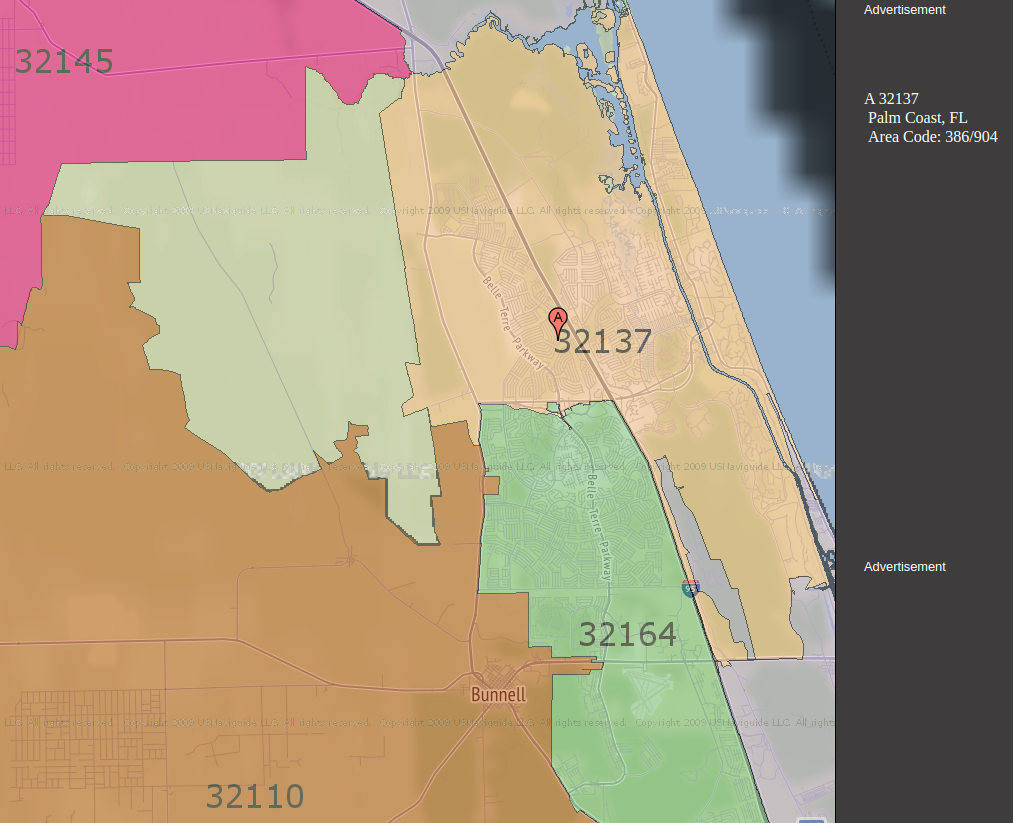

#### 2.3.2 city

Посмотрим на уникальные значения признака.

In [220]:
data['city'] = data['city'].str.lower()
display(data['city'].value_counts()[:60])
print(f"Количество уникальных значений: {data['city'].nunique()}")
print(f"Количество пропущенных значений: {data['city'].isna().sum()}")

houston             24404
san antonio         15485
miami               15407
jacksonville         9870
dallas               8771
brooklyn             7244
orlando              6970
new york             6907
chicago              6894
charlotte            6522
tampa                6421
las vegas            5971
fort worth           5481
austin               5124
fort lauderdale      5077
cleveland            5000
nashville            4969
philadelphia         4765
washington           4585
los angeles          4167
seattle              4062
kissimmee            3955
atlanta              3950
ocala                3316
palm coast           3245
port charlotte       3145
detroit              3111
indianapolis         2646
miami beach          2621
denver               2618
saint petersburg     2501
lehigh acres         2499
memphis              2473
raleigh              2445
punta gorda          2412
portland             2120
chattanooga          2033
el paso              2011
durham      

Количество уникальных значений: 1897
Количество пропущенных значений: 34


Практически одинаковые названия городов можно было бы привести к единообразному написанию, сверив по штату или почтовому индексу их идентичность, чтобы не объединить в один город населённые пункты из разных штатов с одинаковым названием. Пока не понятно будет ли *city* коррелировать с *zipcode*, поэтому проведём работу по дальнейшей очистке позже, если это понадобится или избавимся от этого признака. А пока займёмся выявлением неявных пропусков.

Количество уникальных значений: 1895


Количество пропущенных значений: 62


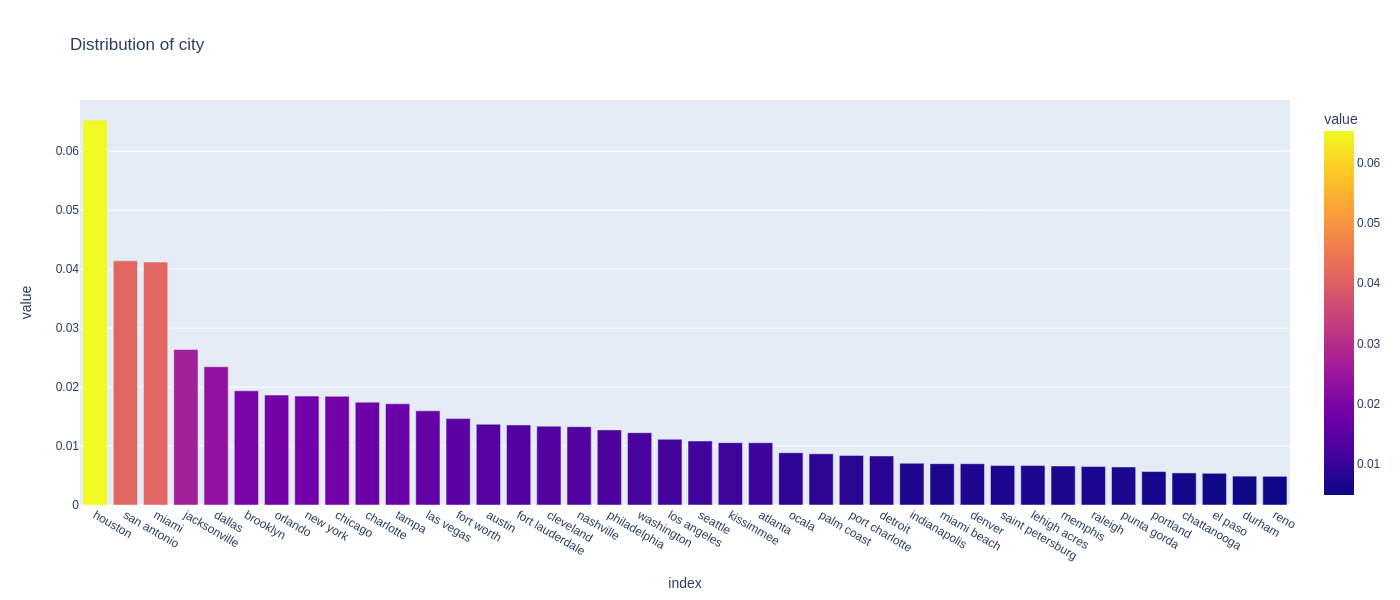

In [221]:
# Заменим неявные пропуски на NAN
data.loc[(data['city'] == ' ') | (data['city'] == '--'), 'city'] = np.NAN

print(f"Количество уникальных значений: {data['city'].nunique()}")
print(f"Количество пропущенных значений: {data['city'].isna().sum()}")

# Посмотрим на распределение признака
fig = px.bar(
    data_frame=data['city'].value_counts(normalize=True).head(40),
    color='value',
    title='Distribution of city',
    width=1400,
    height=600
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_5.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

In [222]:
#np.sum(data['city'].value_counts(normalize=True)[:5].values*100)

В столбце явно выделяются 5 категорий, которые описывают чуть менее 20% наблюдений, а после наблюдается постепенный спад по числу наблюдений. Поэтому пока оставим этот признак без преобразований.

#### 2.3.3 zipcode

In [223]:
display(data['zipcode'].value_counts()[:60])
print(f"Количество уникальных значений: {data['zipcode'].nunique()}")
print(f"Количество пропущенных значений: {data['zipcode'].isna().sum()}")

32137    2139
33131    1561
34747    1487
78245    1383
34759    1331
33132    1327
33137    1306
78253    1277
78254    1227
33130    1168
34746    1150
32164    1106
33160    1103
33133    1063
33308    1023
33178    1003
33141     982
33140     953
77845     950
33304     949
33319     917
77008     900
33955     888
33301     886
77007     873
33981     855
33154     846
32218     830
32259     829
33139     809
77024     805
33974     757
32256     757
33647     751
33180     737
33947     720
33311     694
77004     692
78260     684
33179     682
28278     679
34135     668
33156     667
77055     664
77057     663
77009     662
77018     647
32210     646
33312     636
33019     624
33129     620
78209     617
37209     617
28078     616
33946     606
33953     603
33954     603
33313     599
79928     597
33972     594
Name: zipcode, dtype: int64

Количество уникальных значений: 4532
Количество пропущенных значений: 0


Количество уникальных значений: 4530
Количество пропущенных значений: 4


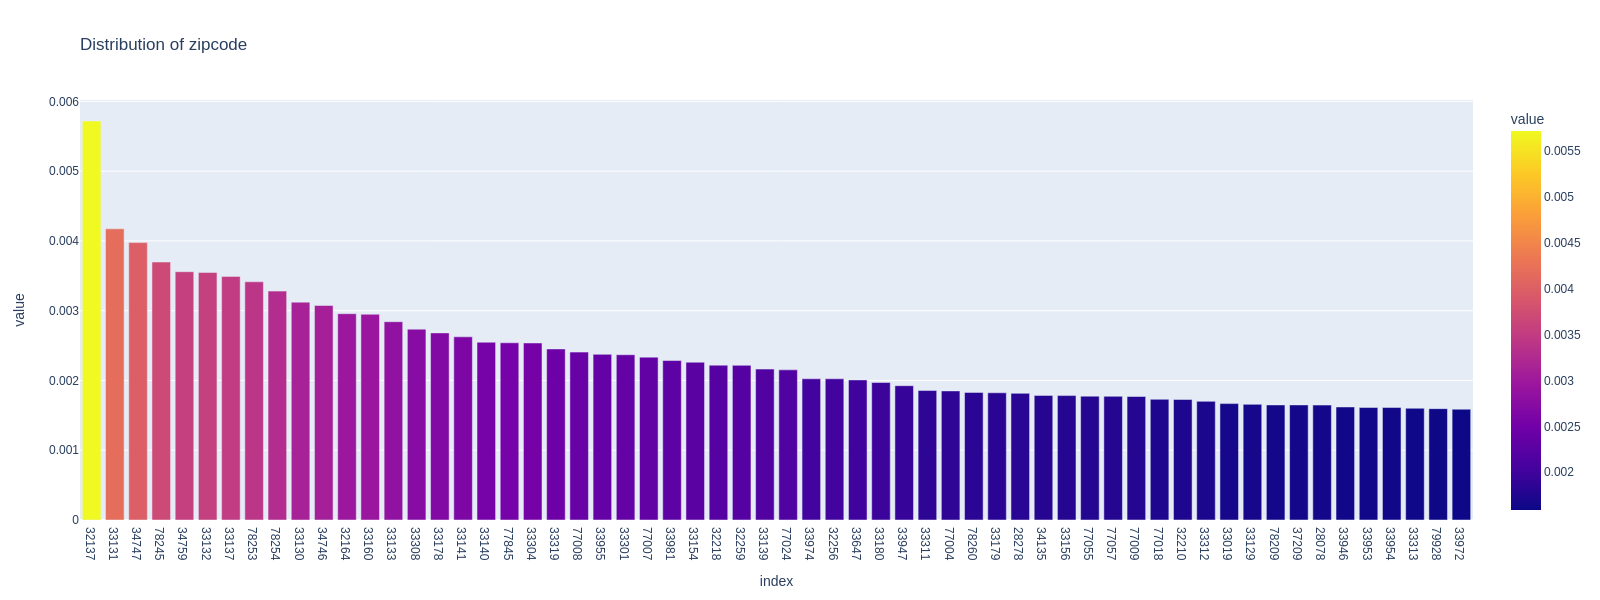

In [224]:
# Заменим неявные пропуски на NAN
data.loc[(data['zipcode'] == '0') | (data['zipcode'] == '--'), 'zipcode'] = np.NaN

print(f"Количество уникальных значений: {data['zipcode'].nunique()}")
print(f"Количество пропущенных значений: {data['zipcode'].isna().sum()}")

# Посмотрим на итоговое распределение признака zipcode
fig = px.bar(
    data_frame=data['zipcode'].value_counts(normalize=True)[:60],
    color='value',
    title='Distribution of zipcode',
    width=1600,
    height=600
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_6.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

В столце *zipcode* выбивается из распределения только одна категория. Группировать этот признак на территориальные структуры внутри одного города достаточно трудоёмко. Проще разбить объекты по городам, но у нас в данных уже есть признак *city*, поэтому оставим *zipcode* без дальнейших преобразований, чтобы не потерять информацию о местоположении объектов недвижимости внутри населёного пункта, которое вполне может влиять на стоимость.

> *В дальнейшем, при обучении модели, на вход подавались данные без признака *zipcode*, но это ухудшало метрики и прогноз, поэтому этот признак пришлось сохранить.*

#### 2.3.4 state

Посмотрим на уникальные значения признака.

In [225]:
data['state'] = data['state'].str.upper()
display(data['state'].value_counts())
display(data['state'].unique())
print(f"Количество уникальных значений: {data['state'].nunique()}")
print(f"Количество пропущенных значений: {data['state'].isna().sum()}")

FL    114526
TX     83212
NY     24293
CA     23183
NC     21729
TN     18138
WA     13715
OH     12427
IL      8851
NV      8390
GA      6634
CO      6336
PA      5505
MI      5124
DC      4585
AZ      3347
IN      3260
OR      2777
MA      1497
UT      1316
MD      1086
VT       858
MO       825
VA       800
WI       452
NJ       436
ME       251
IA       242
KY        89
OK        49
MS        40
SC        28
MT         7
DE         5
BA         1
AL         1
OT         1
OS         1
Name: state, dtype: int64

array(['NC', 'WA', 'CA', 'TX', 'FL', 'PA', 'TN', 'IA', 'NY', 'OR', 'DC',
       'NV', 'AZ', 'GA', 'IL', 'NJ', 'MA', 'OH', 'IN', 'UT', 'MI', 'VT',
       'MD', 'CO', 'VA', 'KY', 'MO', 'WI', 'ME', 'MS', 'OK', 'SC', 'MT',
       'DE', 'BA', 'AL', 'OT', 'OS'], dtype=object)

Количество уникальных значений: 38
Количество пропущенных значений: 0


Удалим строки с выбросами, в которых значения в признаке *state* не обозначают штат США или округ Колумбия.

 Результирующий размер таблицы: (374014, 21)


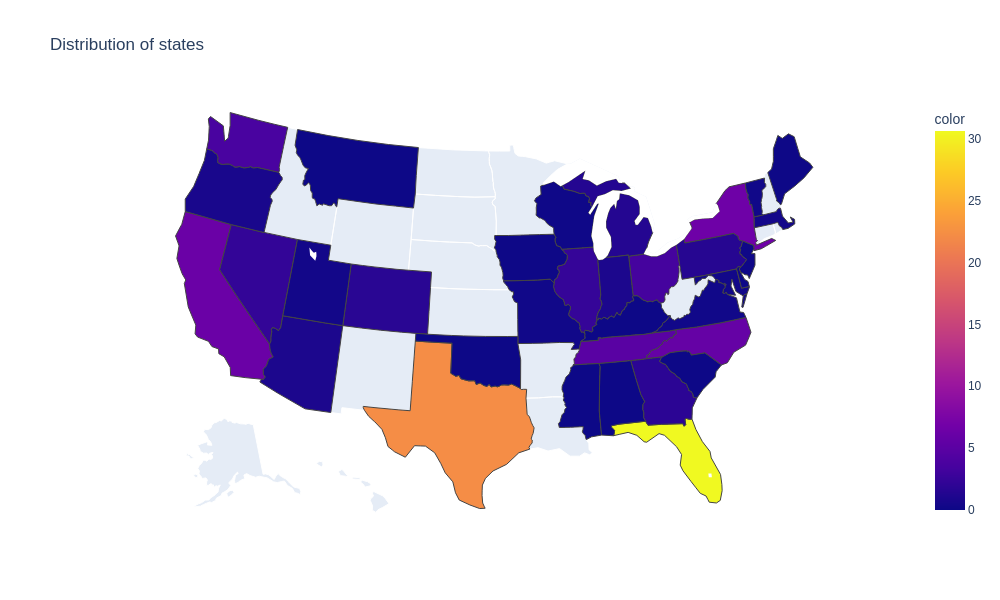

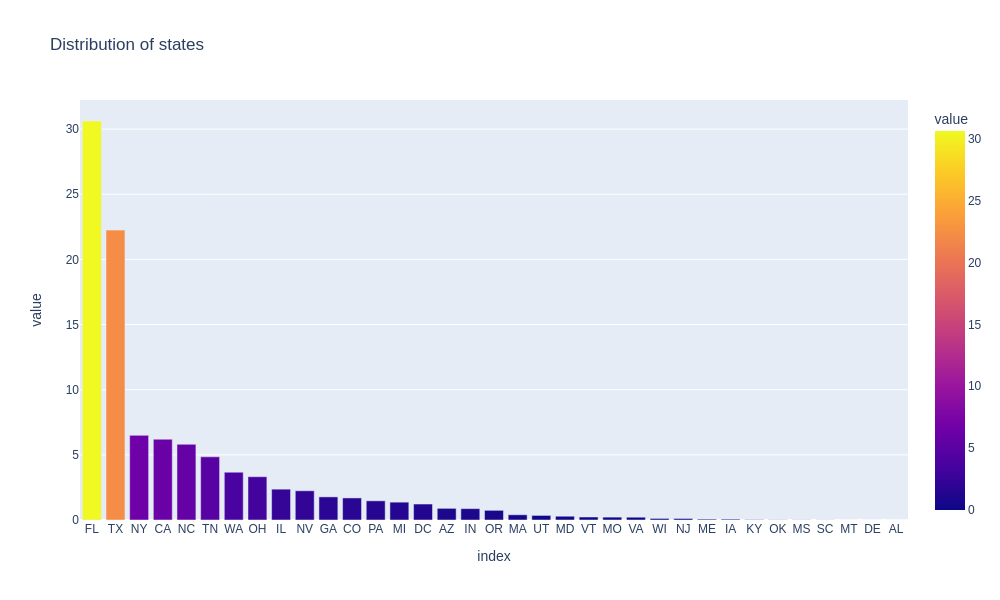

In [226]:
# Создадим список штатов
state_list = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
              'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
              'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
              'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
              'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC']

# Удалим выбросы и посмотрим на результирующий размер таблицы
data = data[data['state'].isin(state_list)]
print(f" Результирующий размер таблицы: {data.shape}")

states_distribution = data['state'].value_counts(normalize=True) * 100

# Посмотрим на распределение штатов
fig = px.choropleth(
    locationmode="USA-states", locations=states_distribution.index, scope="usa", color=states_distribution.values,
    title='Distribution of states',
    width=1000,
    height=600
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_7.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

fig = px.bar(
    data_frame=states_distribution,
    color='value',
    title='Distribution of states',
    width=1000,
    height=600
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_8.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()



8 штатов, охватывают более 80% наблюдений, оставшиеся штаты можно объединить в одну категорию - ***other***. Правда тогда в эту категорию могут попасть штаты, как с заметно высокими ценами на жильё, такие как округ Колумбия, и так и с низкими ценами.

>*Как показала дальнейшая практика, объединение менее популярных штатов в одну категорию ухудшает прогноз, поэтому было решено оставить все штаты и закодировать их двоичным кодированием, и столбцов в этом случае - меньше.*

In [227]:
# # np.sum(data['state'].value_counts(normalize=True)[:8].values*100)

# # Выделим 8 самых популярных штатов (по количеству объектов)
# top_state = list(data['state'].value_counts(normalize=True).index[:7])
# # Оставшиеся штаты объединим в категорию ther
# data.loc[~data['state'].isin(top_state), 'state'] = 'other'

# # Посмотрим на итоговое распределение признака state
# fig = px.bar(
#     data_frame=data['state'].value_counts(normalize=True),
#     color='value',
#     title='Distribution of state',
#     width=1000,
#     height=600
# )
# fig.show()

Удалим признак *street* позже, после выявления дубликатов.

### <center> **2.4 Специфическая информация**

#### 2.4.1 status

In [228]:
data['status'] = data['status'].str.lower()
display(data['status'].value_counts()[:60])
display(data['status'].unique())
print(f"Количество уникальных значений: {data['status'].nunique()}")
print(f"Количество пропущенных значений: {data['status'].isna().sum()}")

for sale                             199013
active                               105140
foreclosure                            6017
new construction                       5455
pending                                4802
pre-foreclosure                        1981
p                                      1488
pre-foreclosure / auction              1281
under contract show                    1183
 / auction                              799
under contract   showing                793
active under contract                   718
under contract                          692
new                                     690
contingent                              581
price change                            562
auction                                 493
a active                                443
for rent                                398
foreclosed                              294
under contract backups                  252
contingent finance and inspection       245
pending continue to show        

array(['active', 'for sale', nan, 'new construction', 'new', 'pending',
       'p', 'active/contingent', ' / auction', 'under contract',
       'pre-foreclosure / auction', 'under contract   showing',
       'pre-foreclosure', 'under contract backups',
       'active under contract', 'foreclosure', 'foreclosed',
       'option pending', 'under contract show', 'for rent', 'auction',
       'a active', 'contingent', 'pending   continue to show',
       'price change', 'back on market', 'active option',
       'coming soon: nov 21.', 'contingent finance and inspection',
       'coming soon: dec 4.', 'p pending sale', 'coming soon: nov 23.',
       'active with contingencies', 'pending ab', 'pf', 'contingent show',
       'contract p', 'contingent take backup', 'apartment for rent',
       'backup contract', 'option contract', 'pending continue to show',
       'pending inspection', 'active option contract', 'c',
       'auction - active', 'contingent   show', 'pi',
       'due diligence p

Количество уникальных значений: 148
Количество пропущенных значений: 39217


Признак содержит 149 категорий, которые можно объединить по смыслу в 14. Большая часть категорий не влияет на стоимость недвижимости, а определяет статус сделки, например: 

* **active** - действительно;
* **for sale** - для продажи;
* **active contingency** — сделка уже практически состоялась;
* **pending backup wanted** - договор уже заключен, однако продавец хочет продолжать показывать недвижимость другим потенциальным покупателям и принимать резервные предложения;
* **recently sold** - недавно продано;
* **price change** - изменение цены;
* **back on market** - снова в продаже;
* **coming soon** - cкоро появится;
* **closed** - сделка закрыта 
и т.д.

Выделим категории влияющие на стоимость оъектов.

* **for sale** - продажа (все категории, о которых говорилось выше);
* **for rent** - аренда
* **foreclosure**  - продажа объектов в связи с неисполнение обязательств по ипотечным платежам или налогам, конфискацией, в том числе и с аукциона, как правило, ниже рыночной стоимости;
* **contingent** - прежде чем объект может быть продан, должны быть выполнены определенные условия, что может отпугивать потенциального покупателя и влиять на стоимость.

In [229]:
# Выделим категории влияющие на стоимость оъектов.
status_dict = {'for rent': 'rent', 'foreclosure': 'foreclos', 'contingent': 'contingen'}

for category, value in status_dict.items():
    data.loc[data['status'].str.contains(value, na=False), 'status'] = category

data.loc[(~data['status'].isna()) & (~data['status'].isin(status_dict.keys())), 'status'] = 'for sale'
    
display(data['status'].value_counts())
display(data['status'].unique())
print(f"Количество пропущенных значений: {data['status'].isna().sum()}")

for sale       323697
foreclosure      9575
contingent       1113
for rent          412
Name: status, dtype: int64

array(['for sale', nan, 'contingent', 'foreclosure', 'for rent'],
      dtype=object)

Количество пропущенных значений: 39217


#### 2.4.2 MlsId и mls-id 

Столбец *mls-id* содержит более 93% пропусков, поэтому позднее будет удалён. Посмотрим, есть ли в столбце *mls-id* непустые значения в строках, где признак *MlsId* незаполнен. Посмотрим на заполнение столбца *MlsId*.

In [230]:
# Посмотрим, есть ли в столбце mls-id непустые значения в строках, где в MlsId незаполнен.
print(f" Cтроки с пропущенными MlsId заполнены значениями mls-id на {100 - data[data['MlsId'].isna()]['mls-id'].isnull().mean()*100}%.")

 Cтроки с пропущенными MlsId заполнены значениями mls-id на 38.65688575291796%.


Посмотрим на заполнение столбца *MlsId*.

In [231]:
data['MlsId'] = data['MlsId'].str.lower()
display(data['MlsId'].value_counts()[:60])
display(data['MlsId'].unique())
print(f"Количество уникальных значений: {data['MlsId'].nunique()}")
print(f"Количество пропущенных значений: {data['MlsId'].isna().sum()}")

no mls                        38
no mls #                      16
 a, houston, tx 77008         13
 12a, orlando, fl 32833       11
no                             9
 1, south boston, ma 02127     9
 b, houston, tx 77008          9
 11a, orlando, fl 32833        8
 2, washington, dc 20002       8
 b, houston, tx 77007          8
 1, washington, dc 20002       7
 2, washington, dc 20010       7
 2, boston, ma 02129           6
 0, doral, fl 33178            6
 1, washington, dc 20010       6
2088662                        6
 2, washington, dc 20009       6
 a, austin, tx 78721           6
 2, washington, dc 20001       6
 3a, orlando, fl 32833         6
1412350                        6
 a, austin, tx 78704           6
 1a, orlando, fl 32833         6
2101941                        6
nomlsid                        6
 1, washington, dc 20001       6
14212336                       5
1000123741                     5
14237217                       5
 b, houston, tx 77057          5
 a, austin

array(['611019', '201916904', 'fr19221027', ..., '2152007', '219049831',
       '10374233'], dtype=object)

Количество уникальных значений: 232473
Количество пропущенных значений: 64343


Заполним пропуски признака *MlsId* непустыми значениями из столбца *mls-id* и посмотрим на результирующее количество пропусков.
Заменим значения, не содержащие номер объекта ('no mls', 'no mls #', 'non mls', 'nomlsid', 'nonmls',  'no mls ', '2new4mls*',  'not on mls', '*2new4mls*', 
 'no  mls #', '**new24mls**'), на NAN.

In [232]:
# Заменим соответствующими непустыми значениями mls-id пропуски в MlsId
data['MlsId'] = np.where(data['MlsId'].isna(), data['mls-id'].str.lower(), data['MlsId'])

data.loc[data['MlsId'].str.contains('mls', na=False), 'MlsId'] = np.NAN

display(data['MlsId'].value_counts()[:60])
display(data['MlsId'].unique())
print(f"Количество уникальных значений: {data['MlsId'].nunique()}")
print(f"Количество пропущенных значений: {data['MlsId'].isna().sum()}")

 a, houston, tx 77008         13
no                            12
 12a, orlando, fl 32833       11
 1, south boston, ma 02127     9
 b, houston, tx 77008          9
 2, washington, dc 20002       8
 b, houston, tx 77007          8
 11a, orlando, fl 32833        8
 2, washington, dc 20010       7
 1, washington, dc 20002       7
 2, boston, ma 02129           6
 1a, orlando, fl 32833         6
 2, washington, dc 20001       6
 2, washington, dc 20009       6
 0, doral, fl 33178            6
 3a, orlando, fl 32833         6
2088662                        6
 1, washington, dc 20010       6
 a, austin, tx 78721           6
 1, washington, dc 20001       6
 a, austin, tx 78704           6
2101941                        6
1412350                        6
 1, washington, dc 20009       5
21679600                       5
dcdc451020                     5
14191214                       5
a10772837                      5
14181176                       5
1026004                        5
1520876   

array(['611019', '201916904', 'fr19221027', ..., '2152007', '219049831',
       '10374233'], dtype=object)

Количество уникальных значений: 248486
Количество пропущенных значений: 39545


В столбце *MlsId* содержится много дубликатов, что кажется странным, учитывая, что это — идентификатор MLS (Multiple Listing Service - система
мультилистинга). Часть строк полностью или практически идентичны, некоторые - обьекты имеют схожие характеристики, т.е. договор с агентством был заключён не на 1 объект, а на несколько. Таким образом, нельзя избавляться от дубликатов только на основании идентичности идентификатора МЛС

Мультилистинговая система (МЛС) является полной противоположностью ресурсам со свободным доступом. В этой системе не может быть объявлений о несуществующих квартирах, объявлений с заниженной ценой, а также прочих объявлений, которые могут ввести в заблуждение, и стать причиной многочисленных, непродуктивных действий риэлтора. Единственным основанием для включения объекта недвижимости в мультилистинг является наличие эксклюзивного договора по данному объекту. Поэтому в дальнейшем можно пометить в данных все объекты, которые не имеют идентификатора МЛС, как сомнительные.

Удалим признак *mls-id*.

In [233]:
print(f"Размер таблицы до удаления объектов: {data.shape}")
data = data.drop(['mls-id'], axis=1)

print(f"Размер таблицы после удаления объектов: {data.shape}")

Размер таблицы до удаления объектов: (374014, 21)
Размер таблицы после удаления объектов: (374014, 20)


### <center> **2.5  Целевой признак - target**


Посмотрим какие типы недвижимости содержат подстроку **/mo** (стоимость аренды в месяц).

In [234]:
data[data['target'].str.contains('/mo', regex=True)]['status'].value_counts()

for rent    398
Name: status, dtype: int64

Т.к. строки, содержащие **/mo** (стоимость аренды в месяц), имеют только объекты типа недвижимости **for rent**, удалим все строки с **for rent**, т.к. для предсказания стоимости объектов они не нужны.
Приведём целевой признак к числовому виду.

Размер таблицы до удаления объектов: (374014, 20)
Размер таблицы после удаления объектов: (373602, 20)


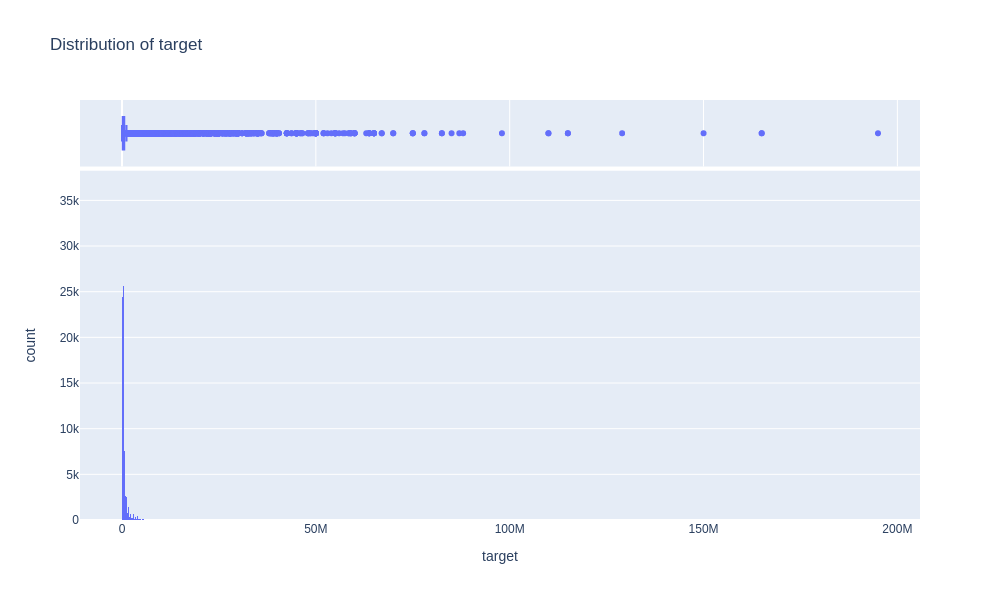

In [235]:
print(f"Размер таблицы до удаления объектов: {data.shape}")
data = data[~(data['status'] == 'for rent')]
print(f"Размер таблицы после удаления объектов: {data.shape}")

# Избавимся от всех символов, которые не являются цифрами.
data['target'] = data['target'].str.replace('\D+', '', regex=True).astype(int)

# Посморим на распределение стоимости объектов недвижимости

fig = px.histogram(
    data,
    x='target',
    #color="",
    title="Distribution of target",
    width=1000,
    height=600,
    #color_discrete_sequence=["red", "blue"],
    #nbins=20,
    marginal='box',  
    #histnorm='percent' 
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_9.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

Удалим дубликаты по ключевым столбцам.

Как показал анализ данных значения в столбец *street* также содержит и номера домов, т.е. является одним из важных факторов для определения дубликатов, но не решающим, т.к. могут попадаться квартиры в одном и том же доме, отличающиеся по другим параметрам.  Также в данных присутствуют одни и те же объекты, но с незначительным различием в площадях, возникших в результате человеческого фактора. Т.о. признак площади не является определяющим в выявлении дубликатов, как и стоимость, т.к. в данных содержатся объекты, которые с течением времени меняли стоимость. С другой стороны отсеив эти признаки из ключевых мы можем потерять объекты с одним и тем же адресом но разными площадями и стоимостью, например, квартиры или таунхаусы. Предположим, что для предсказания не страшно иметь дубли с небольшим различием в цене и площади, что вполне допустимо и создаёт вариативность в рамках одного типа недвижимости, поэтому сделаем поиск дубликатов достаточно жёстким, но с послаблением по внешне незначительным признакам.

In [236]:
# Создадим список ключевых столбцов для поиска дубликатов
keys1 = ['street', 'baths', 'sqft', 'zipcode', 'beds', 'state', 'stories', 'target', 'property_type', 'year_built', 'MlsId']
print(f"Количество дубликатов: {data.duplicated(subset=keys1).sum()}")
print(f"Размер таблицы до удаления объектов: {data.shape}")
display(data[data.duplicated(subset=keys1, keep=False)].sort_values(by='street').head(10))

# Избавимся от дубликатов по ключам, оставив более поздние записи
data = data.drop_duplicates(subset=keys1, keep='last')

Количество дубликатов: 16165
Размер таблицы до удаления объектов: (373602, 20)


status                  street  baths                          city  \
239773  for sale   (undisclosed address)    2.0                    marysville   
147683  for sale   (undisclosed address)    2.0                    marysville   
93587        NaN        0 island lake dr    NaN  other city value out of area   
273164       NaN        0 island lake dr    NaN                           NaN   
217697  for sale  1 bratenahl pl apt 901    2.0                     bratenahl   
309170  for sale  1 bratenahl pl apt 901    2.0                     bratenahl   
46261   for sale        1 cherokee rd nw    7.0                       atlanta   
305627  for sale        1 cherokee rd nw    7.0                       atlanta   
122090  for sale           1 dartford ln    6.0                   san antonio   
254926       NaN           1 dartford ln    6.0                   san antonio   

          sqft zipcode  beds state  stories      MlsId   target  \
239773  2761.0   98270   6.0    WA      NaN    1476840   650000   
147683  2761.0   98270   6.0    WA      NaN    1476840   650000   
93587      NaN   32226   NaN    FL      NaN  a10749811    89000   
273164     NaN   32226   NaN    FL      NaN  a10749811    89000   
217697  1597.0   44108   2.0    OH      2.0    4087322   309000   
309170  1597.0   44108   2.0    OH      2.0    4087322   309000   
46261   6742.0   30305   6.0    GA      2.0    6614553  4999999   
305627  6742.0   30305   6.0    GA      2.0    6614553  4999999   
122090  7643.0   78257   5.0    TX      1.0    1398021  1895000   
254926  7643.0   78257   5.0    TX      1.0    1398021  1895000   

        property_type  year_built year_built_category  is_remodeled  \
239773  single family      1961.0           1951-1975           NaN   
147683  single family      1961.0           1951-1975           NaN   
93587             NaN         NaN                 NaN           NaN   
273164            NaN         NaN                 NaN           NaN   
217697    condominium      1968.0           1951-1975           0.0   
309170    condominium      1968.0           1951-1975           NaN   
46261   single family      1923.0           1901-1925           1.0   
305627  single family      1923.0           1901-1925           1.0   
122090  single family      1986.0           1976-2000           1.0   
254926  single family      1986.0           1976-2000           1.0   

           heating  lot size sqft  num_of_schools  average_rating  \
239773       other        18731.0             3.0             2.0   
147683  forced air        18731.0             3.0             2.0   
93587         None            NaN             3.0             6.0   
273164        None            NaN             3.0             6.0   
217697  forced air       390833.0             8.0             3.0   
309170  forced air            NaN             2.0             2.0   
46261        other        69696.0             3.0             7.0   
305627       other        69696.0             3.0             7.0   
122090       other        62291.0             3.0             8.0   
254926       other        62291.0             3.0             8.0   

        average_distance_to_school  
239773                         1.0  
147683                         1.0  
93587                          5.0  
273164                         5.0  
217697                         3.0  
309170                         9.0  
46261                          2.0  
305627                         2.0  
122090                         5.0  
254926                         4.0

Посмотрим на дубликаты, немного ослабив условия(без *MlsId*). *MlsId* вполне мог поменяться, если договор расторгался, а потом заключался заново, или в написании *MlsId* были допущены опечатки.

In [237]:
# Создадим список ключевых столбцов для поиска дубликатов без признака MlsId
keys2 = ['street', 'baths', 'sqft', 'zipcode', 'beds', 'state', 'stories', 'target', 'property_type', 'year_built']

print(f"Количество дубликатов: {data.duplicated(subset=keys2).sum()}")
print(f"Размер таблицы до удаления объектов: {data.shape}")
data[data.duplicated(subset=keys2, keep=False)].sort_values(by='street').head(10)

# Избавимся от дубликатов по ключам, оставив более поздние записи
data = data.drop_duplicates(subset=keys2, keep='last')

# Удалим столбцы, которые далее не нужны
data = data.drop(['year_built', 'street'], axis = 1)

print(f"Размер таблицы после удаления объектов: {data.shape}")
(data.isna().mean() * 100).sort_values(ascending=False)

Количество дубликатов: 536
Размер таблицы до удаления объектов: (357437, 20)
Размер таблицы после удаления объектов: (356901, 18)


stories                       39.421576
heating                       29.947801
lot size sqft                 26.296368
beds                          23.279565
baths                         22.361944
sqft                          11.326390
MlsId                         10.938888
year_built_category           10.037517
status                        10.022948
property_type                  9.658981
is_remodeled                   3.264491
average_rating                 1.386939
average_distance_to_school     1.241801
num_of_schools                 1.142614
city                           0.016531
zipcode                        0.001121
state                          0.000000
target                         0.000000
dtype: float64

Удалим очевидные выбросы и пропуски в целевой переменной и признаках, соответствующие невозможным и нелогичным значениям в данных. Удалим строки с категориями lot/land* и *land*, как координально отличающиеся от остальных типов объектов в признаке *property_type*, столбец stories, содержащий почти 40% пропусков.

> *Категории *lot/land* и *land* содержат нули в в важных для модели признаках, поэтому пришлось от них избавиться. Целевую переменную для этих категорий лучше предсказывать отдельно, т.к. здесь определяющим фактором является размер земельного участка, который не сильно влияет на стоимость для других типов объектов недвижимости, имеющих строения.Столбец размер земельного участка (*lot size sqft*) также ухудшал прогноз, пришлось и его удалить, как и столбец *bed*, удаление которого стало необходимым уже после построения прогноза.*

In [238]:
# # Заменим тип недвижимости на NAN если на земле или участке земли есть строения
# data.loc[((data['property_type'] == 'lot/land') | (data['property_type'] == 'land')) 
#          & ((data['beds'] > 0) | (data['baths'] > 0) | (data['year_built_category'] != 'no buildings')), 'property_type'] = np.NAN

# # Заполним lot size sqft значениями из sqft для типа недвижимости земля, земельный участок
# data.loc[((data['property_type'] == 'lot/land') | (data['property_type'] == 'land')) & (data['lot size sqft'].isna()), 'lot size sqft'] = data['sqft']
# (data.isna().mean()*100).sort_values(ascending=False)

# # Заменим для типа недвижимости земля, земельный участок значения sqft, baths, beds, stories, is_remodeled на 0
# cols_for_change = ['sqft', 'stories', 'is_remodeled']
# for col in cols_for_change:
#     data.loc[(data['property_type'] == 'lot/land') | (data['property_type'] == 'land'), col] = 0

# # Заменим для типа недвижимости земля, земельный участок значения heating 'no buildings' 
# data.loc[(data['property_type'] == 'lot/land') | (data['property_type'] == 'land'), 'heating'] = 'no buildings'
    
# # Удалим строки с отсутствующими значениями lot size sqft для типа недвижимости земля, земельный участок, 
# data = data[~(((data['property_type'] == 'lot/land') | (data['property_type'] == 'land')) & (data['lot size sqft'].isna()))]

# Удалим строки с типом недвижимость земля, земельный участок
print(f"Размер таблицы до удаления объектов: {data.shape}")
data = (data[(data['property_type'] != 'land') & (data['property_type'] != 'lot/land')])

# Удалим для остальных типов недвижимости строки, где отсутствуют основные сведения об объекте
data = data[(data['sqft'].notna()) & (data['year_built_category'].notna()) & (data['baths'].notna()) & (data['beds'].notna())]

# Удалим для всех типов кроме семейный дом и пентхаус, имеющих не более 4 спален, строки с площадью больше 4000 (размер получен в результате анализа реальных объявлений)
data = data[~((data['property_type'] != 'single family') & (data['property_type'] != 'penthouse') & (data['beds'] < 5) & (data['sqft']>4000))]

# Удалим столбцы
data = data.drop(['stories', 'lot size sqft', 'beds'], axis=1)

print(f"Размер таблицы после удаления объектов: {data.shape}")
(data.isna().mean()*100).sort_values(ascending=False)

Размер таблицы до удаления объектов: (356901, 18)
Размер таблицы после удаления объектов: (207781, 15)


status                        14.585068
heating                       11.853827
MlsId                         10.718016
is_remodeled                   3.058990
average_rating                 0.989985
average_distance_to_school     0.806137
num_of_schools                 0.657423
city                           0.004331
zipcode                        0.000481
baths                          0.000000
sqft                           0.000000
state                          0.000000
target                         0.000000
property_type                  0.000000
year_built_category            0.000000
dtype: float64

Посмотрим на коробчатую диаграмму признака *sqft*.

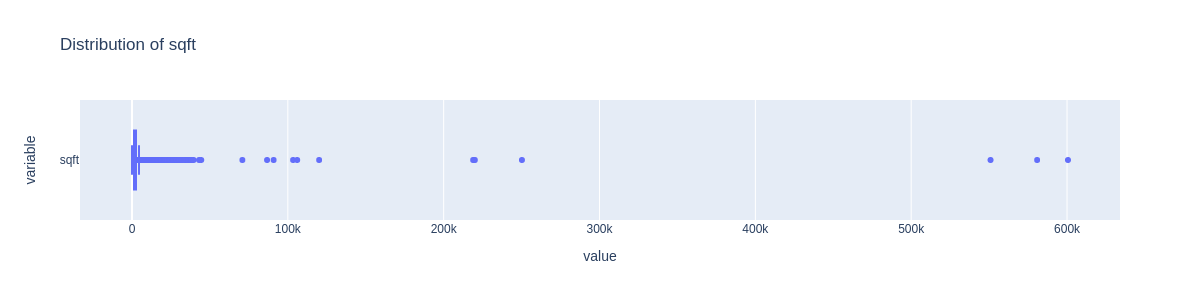

In [239]:
fig = px.box(
    data_frame=data['sqft'],
    title="Distribution of sqft",
    width=1200,
    height=300,
    orientation = "h"   
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_10.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

Удалим значения, которые сильно отдалены от основной группы на диаграммах, тем более, что среди этих значений много объектов с несоответствующей ценой и пропусками в основных характеристиках объекта. Можно было бы прологарифмировать признаки и отсечь выбросы методом z-отклонений, но как уже было сказано выше, при первичном анализе признака sqft, такой подход ведёт к потере вполне реальных объектов с маленькими и большими площадями. В данном случае удобнее использовать более ручной подход, учитывая сильную загрязнённость данных.

Также удалим строки с пропусками в *property_type* т.к. далее будем заполнять пропуски, в первую очередь, посредством группировки по этому фактору.

В целевом признаке много объектов с очень низкой и высокой ценой. Высокая цена вполне объяснима, а вот низкая зависит от статуса и типа объекта недвижимости.
В данных были выявлены объекты с ценой 1000, в основном со статусом foreclosure и немного объектов с пропуском в этом столбце. Все эти объекты схожи, расположены, в большинстве своём, в Детройте, а также немного в Хайланд парке. Скорее всего это объекты для аукциона со стартовой ценой 1000. Удалим их. 
Для того, чтобы найти минимальный ценовой порог для объектов, которые продаются, а не сдаются, предположим, что стоимоть объектов не должна быть ниже стоимости самого дешёвого объекта в самой бюджетной категории, мобильные дома. Такая стоимость найдена, это 6000. Такая стоимость вполне реальна, т.к. мобильные дома могут не иметь своего земельного участка и выглядеть, как обычные бытовки. В диапазоне цен меньше 6000 находятся в основном объекты со статусом foreclosure и совсем немного - для продажи и с пропуском в признаке статус. Поэтому удалим все строки, где *target* меньше 6000. На самом деле это просто полумера. Признак стоимости требует более пристального внимания и анализа в разрезе типа объекта, а также изучения их рыночной стоимости в открытых источниках, а это тянет на отдельную дипломную работу.

In [240]:
print(f"Размер таблицы до удаления объектов: {data.shape}")
# Удалим выбросы в признакe sqft
data = data[(data['sqft'] > 86) & (data['sqft'] <= 4546)]
#data = data[(data['lot size sqft'].isna()) | ((data['lot size sqft'] > 3200) & (data['lot size sqft'] <= 24058))] # участки больше наших привычных 3-х соток, 
# хотя в объявлениях,которые удалось просмотреть не попалось ни одного участка менее 800 м2)

# Удалим строки с пропусками в property_type
data = data.dropna(subset='property_type')

# Удалим строки, с ценой меньше 6000
data = data[data['target'] > 6000]

print(f"Размер таблицы после удаления объектов: {data.shape}")

# Посмотрим на описательные статистики
display(data.describe(include='all'))

data['property_type'].value_counts()
(data.isna().mean()*100).sort_values(ascending=False)

Размер таблицы до удаления объектов: (207781, 15)


Размер таблицы после удаления объектов: (195819, 15)


status          baths     city           sqft zipcode   state  \
count     166687  195819.000000   195816  195819.000000  195818  195819   
unique         3            NaN     1538            NaN    4030      34   
top     for sale            NaN  houston            NaN   33131      FL   
freq      159989            NaN    10675            NaN     938   58700   
mean         NaN       2.588532      NaN    1983.717653     NaN     NaN   
std          NaN       1.003524      NaN     841.243913     NaN     NaN   
min          NaN       0.750000      NaN      90.000000     NaN     NaN   
25%          NaN       2.000000      NaN    1338.000000     NaN     NaN   
50%          NaN       2.000000      NaN    1812.000000     NaN     NaN   
75%          NaN       3.000000      NaN    2478.000000     NaN     NaN   
max          NaN      40.000000      NaN    4546.000000     NaN     NaN   

                        MlsId        target  property_type  \
count                  174302  1.958190e+05         195819   
unique                 158339           NaN              6   
top      a, houston, tx 77008           NaN  single family   
freq                       13           NaN         133448   
mean                      NaN  5.071953e+05            NaN   
std                       NaN  7.490072e+05            NaN   
min                       NaN  6.100000e+03            NaN   
25%                       NaN  2.149500e+05            NaN   
50%                       NaN  3.309840e+05            NaN   
75%                       NaN  5.500000e+05            NaN   
max                       NaN  5.000000e+07            NaN   

       year_built_category   is_remodeled     heating  num_of_schools  \
count               195819  189717.000000      172401   194538.000000   
unique                   7            NaN           2             NaN   
top              2001-2025            NaN  forced air             NaN   
freq                 75790            NaN      104768             NaN   
mean                   NaN       0.460612         NaN        4.295037   
std                    NaN       0.498448         NaN        4.710001   
min                    NaN       0.000000         NaN        1.000000   
25%                    NaN       0.000000         NaN        3.000000   
50%                    NaN       0.000000         NaN        3.000000   
75%                    NaN       1.000000         NaN        4.000000   
max                    NaN       1.000000         NaN       65.000000   

        average_rating  average_distance_to_school  
count    193885.000000               194245.000000  
unique             NaN                         NaN  
top                NaN                         NaN  
freq               NaN                         NaN  
mean          5.133002                    2.714644  
std           1.944362                    3.232455  
min           1.000000                    0.000000  
25%           4.000000                    1.000000  
50%           5.000000                    2.000000  
75%           6.000000                    3.000000  
max          10.000000                   45.000000

status                        14.877004
heating                       11.959003
MlsId                         10.988208
is_remodeled                   3.116143
average_rating                 0.987647
average_distance_to_school     0.803804
num_of_schools                 0.654176
city                           0.001532
zipcode                        0.000511
baths                          0.000000
sqft                           0.000000
state                          0.000000
target                         0.000000
property_type                  0.000000
year_built_category            0.000000
dtype: float64

Средняя и медиана площади теперь уже не так значительно различаются.

Посмотрим на количество объектов по категориям *property_type* и *heating* после удаления выбросов.

In [241]:
display(data['property_type'].value_counts())
data['heating'].value_counts()

single family              133448
condominium                 37947
other                       13359
apartment                    7464
manufactured/mobil home      2792
cooperative                   809
Name: property_type, dtype: int64

forced air    104768
other          67633
Name: heating, dtype: int64

Посмотрим на распределение стоимости объектов недвижимости.

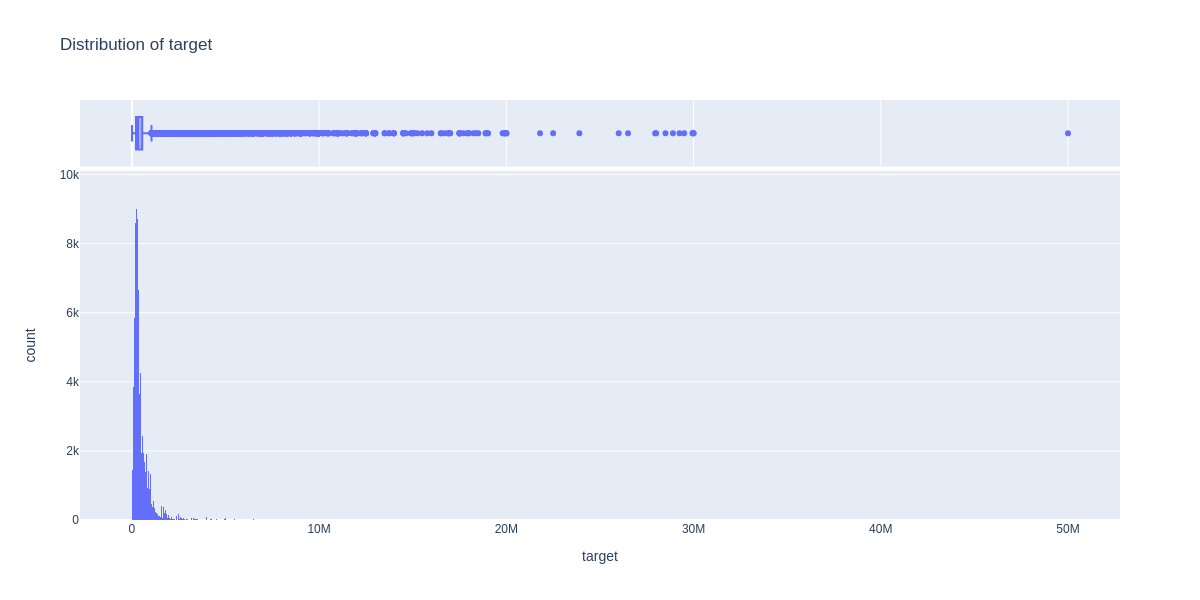

In [242]:
fig = px.histogram(
    data,
    x='target',
    #color="",
    title="Distribution of target",
    width=1200,
    height=600,
    #color_discrete_sequence=["red", "blue"],
    #nbins=20,
    marginal='box',  
    #histnorm='percent' 
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_11.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

In [243]:
print(f"Размер таблицы до удаления объектов: {data.shape}")
#data = data[data['target'] <= data['target'].quantile(.85)]
#data = data[data['target'] <= 2000000]  #отсечка, при которой на тесте максимальный R2: 0.692, но MAE: 55917$, MAPE: 19.71% увеличиваются - 48 признаков
#data = data[data['target'] <= 1500000] #отсечка, при которой на тесте R2: 0.678, MAE: 53231$, MAPE: 19.13% - 48 признаков
data = data[data['target'] <= 1052473] #отсечка, при которой на тесте R2: 0.649, MAE: 50177$, MAPE: 19.02% - 40 признаков/ Test R2: 0.659, лучшие MAE: 49276$ и MAPE: 18.72% - 48 признаков
print(f"Размер таблицы после удаления объектов: {data.shape}")

Размер таблицы до удаления объектов: (195819, 15)
Размер таблицы после удаления объектов: (179494, 15)


Посмотрим на распределение целевой переменной в разрезе признака *property_type*

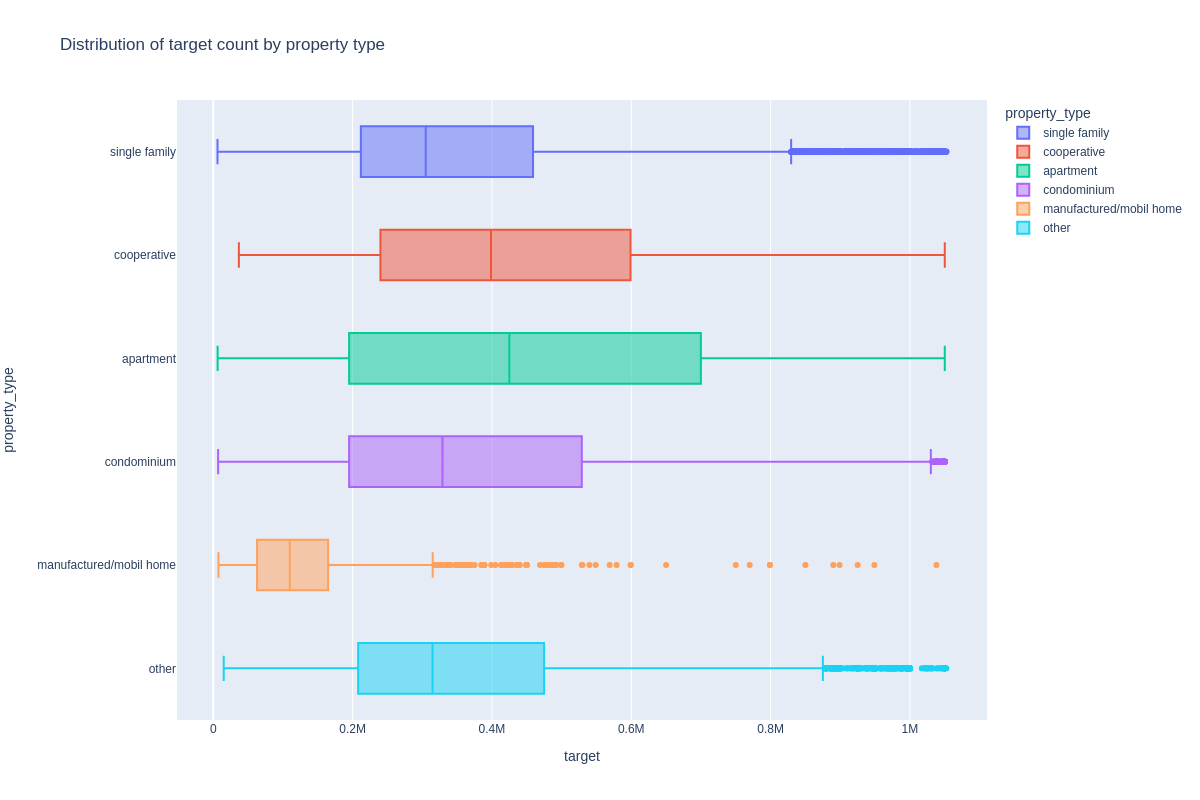

In [244]:
fig = px.box(
    data_frame=data,
    x='target',
    y='property_type',
    color='property_type',
    title='Distribution of target count by property type',
    width=1200,
    height=800
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_12.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

Удалим выбросы *target* ориентируясь на типы объектов недвижимости и посмотрим на получившееся распределение.

Размер таблицы до удаления объектов: (179494, 15)
Размер таблицы после удаления объектов: (129333, 15)


single family              90115
condominium                23670
other                       9171
apartment                   3950
manufactured/mobil home     2012
cooperative                  415
Name: property_type, dtype: int64

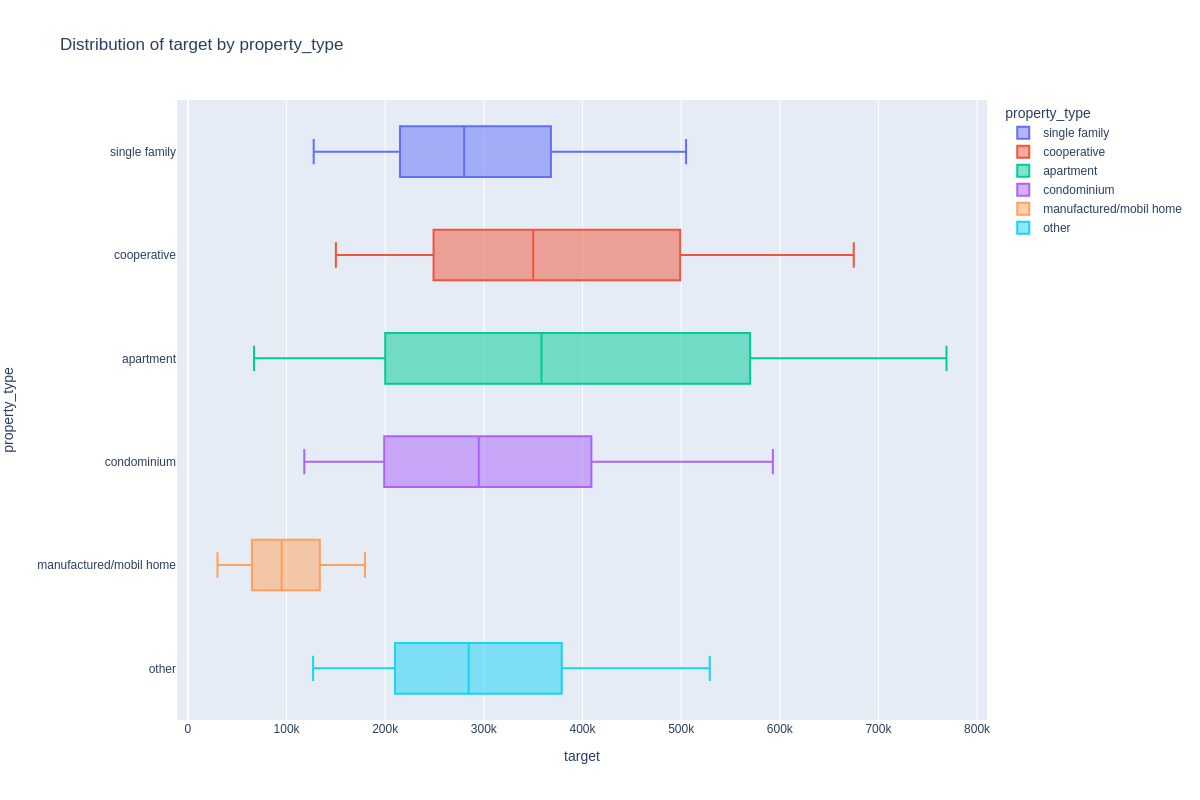

In [245]:
print(f"Размер таблицы до удаления объектов: {data.shape}")


for type in list(data['property_type'].unique()):
    data = data[~((data['property_type'] == type) & (data['target'] > data[data['property_type'] == type]['target'].quantile(.80)))]

for type in list(data['property_type'].unique()):
    data = data[~((data['property_type'] == type) & (data['target'] < data[data['property_type'] == type]['target'].quantile(.1)))]

print(f"Размер таблицы после удаления объектов: {data.shape}")

display(data['property_type'].value_counts())

fig = px.box(
    data_frame=data,
    x='target',
    y='property_type',
    color='property_type',
    title="Distribution of target by property_type",
    width=1200,
    height=800
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_13.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

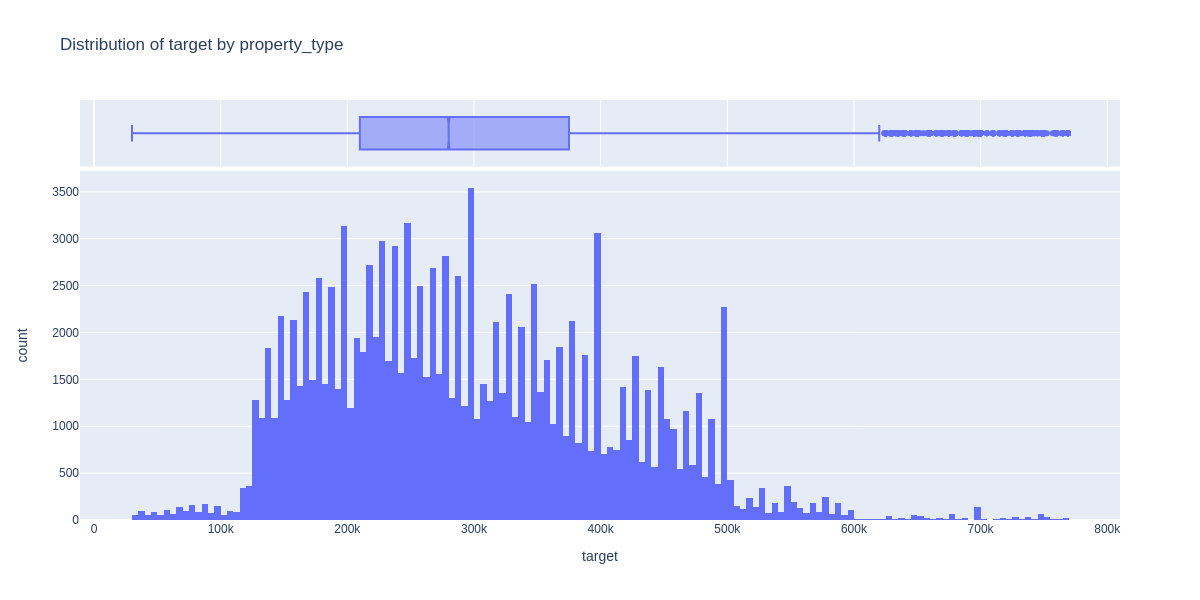

In [246]:
# Посморим на распределение стоимости объектов недвижимости

fig = px.histogram(
    data,
    x='target',
    #color="",
    title="Distribution of target by property_type",
    width=1200,
    height=600,
    #color_discrete_sequence=["red", "blue"],
    #nbins=20,
    marginal='box',  
    #histnorm='percent' 
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_14.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

In [247]:
(data.isna().mean()*100).sort_values(ascending=False)

status                        15.817309
MlsId                         11.345132
heating                       10.297449
is_remodeled                   2.742533
average_rating                 0.843559
average_distance_to_school     0.681187
num_of_schools                 0.539692
city                           0.001546
zipcode                        0.000773
baths                          0.000000
sqft                           0.000000
state                          0.000000
target                         0.000000
property_type                  0.000000
year_built_category            0.000000
dtype: float64

Посмотрим на коробчатую диаграмму признака *baths*.

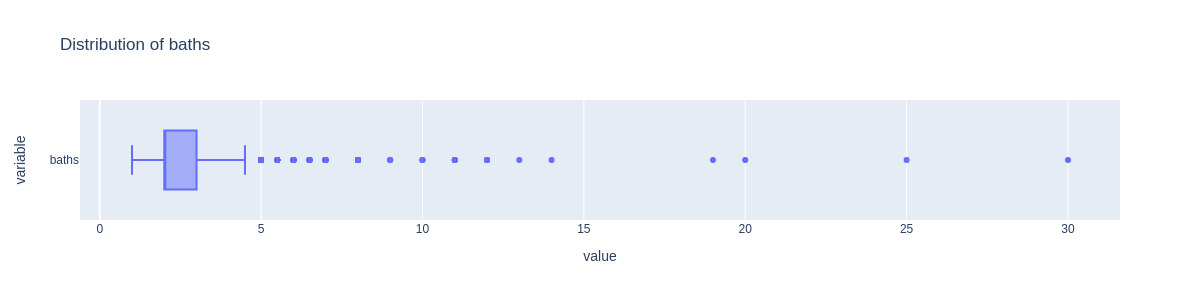

In [248]:
fig = px.box(
    data_frame=data['baths'],
    width=1200,
    height=300,
    title="Distribution of baths",
    orientation='h'
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_15.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

Удалим выбросы *baths* и посмотрим на получившееся распределение.

Размер таблицы до удаления объектов: (129333, 15)
Размер таблицы после удаления объектов: (128064, 15)


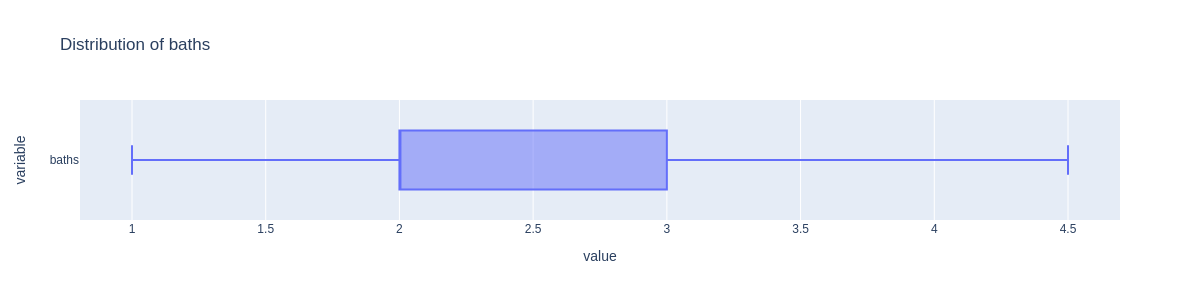

In [249]:
print(f"Размер таблицы до удаления объектов: {data.shape}")
data = data[data['baths'] <= 4.5]
print(f"Размер таблицы после удаления объектов: {data.shape}")

fig = px.box(
    data_frame=data['baths'],
    width=1200,
    height=300,
    title="Distribution of baths",
    orientation='h'
)
# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_16.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()

Заполним пропуски мерами центральной тенденции признака в рамках групп различных категорий. Вначале группируем более детально, заполняем пропуски, далее укрупняем группы и заполняем оставшиеся пропуски. Если пропуск не удалось заполнить таким образом, то заполняем пропуск в признаке мерой центральной тенденции в рамках всех наблюдений, где это применимо по содержанию, или избавляемся от пропусков удалением строк.

После удаления типов недвижимости земля и земельный участок, можно закодировать признак *heating* в бинарный, для лучшей интерпретации заменим столбец на *central_heating*, где 1 - есть центральная система отопления/кондиционирования, 0 - нет.

In [250]:
print(f"Размер таблицы до удаления объектов: {data.shape}")

# Заполним zipcode модой
mode_zipcode = data.groupby(['city', 'property_type'])['zipcode'].transform(lambda x: x.fillna((x.mode()[0] if x.count()!=0 else x)))
data['zipcode'] = data['zipcode'].fillna(mode_zipcode)

# Заполним сity модой
mode_city = data.groupby(['zipcode'])['city'].transform(lambda x: x.fillna((x.mode()[0] if x.count()!=0 else x)))
data['city'] = data['city'].fillna(mode_city)

# Заполним heating модой
mode_heating1 = data.groupby(['zipcode', 'property_type', 'year_built_category'])['heating'].transform(lambda x: x.fillna((x.mode()[0] if x.count()!=0 else x)))
data['heating'] = data['heating'].fillna(mode_heating1)
mode_heating2 = data.groupby(['zipcode', 'property_type'])['heating'].transform(lambda x: x.fillna((x.mode()[0] if x.count()!=0 else x)))
data['heating'] = data['heating'].fillna(mode_heating2)
mode_heating3 = data.groupby(['city', 'property_type'])['heating'].transform(lambda x: x.fillna((x.mode()[0] if x.count()!=0 else x)))
data['heating'] = data['heating'].fillna(mode_heating3)
data['heating'] = data['heating'].fillna(data['heating'].mode()[0])

# Заполним is_remodeled модой
mode_is_remodeled1 = data.groupby(['zipcode', 'year_built_category'])['is_remodeled'].transform(lambda x: x.fillna((x.mode()[0] if x.count()!=0 else x)))
data['is_remodeled'] = data['is_remodeled'].fillna(mode_is_remodeled1)
mode_is_remodeled2 = data.groupby(['city', 'year_built_category'])['is_remodeled'].transform(lambda x: x.fillna((x.mode()[0] if x.count()!=0 else x)))
data['is_remodeled'] = data['is_remodeled'].fillna(mode_is_remodeled2)
mode_is_remodeled3 = data.groupby(['state', 'year_built_category'])['is_remodeled'].transform(lambda x: x.fillna((x.mode()[0] if x.count()!=0 else x)))
data['is_remodeled'] = data['is_remodeled'].fillna(mode_is_remodeled3)

# Заполним num_of_schools медианой
median_num_of_schools1 = data.groupby(['zipcode'])['num_of_schools'].transform('median').round()
data['num_of_schools'] = data['num_of_schools'].fillna(median_num_of_schools1)
median_num_of_schools2 = data.groupby(['city', 'property_type'])['num_of_schools'].transform('median').round()
data['num_of_schools'] = data['num_of_schools'].fillna(median_num_of_schools2)
median_num_of_schools3 = data.groupby(['state', 'property_type'])['num_of_schools'].transform('median').round()
data['num_of_schools'] = data['num_of_schools'].fillna(median_num_of_schools3)

# Заполним average_distance_to_school медианой
median_average_distance1 = data.groupby(['zipcode'])['average_distance_to_school'].transform('median').round()
data['average_distance_to_school'] = data['average_distance_to_school'].fillna(median_average_distance1)
median_average_distance2 = data.groupby(['city', 'property_type'])['average_distance_to_school'].transform('median').round()
data['average_distance_to_school'] = data['average_distance_to_school'].fillna(median_average_distance2)
median_average_distance3 = data.groupby(['state', 'property_type'])['average_distance_to_school'].transform('median').round()
data['average_distance_to_school'] = data['average_distance_to_school'].fillna(median_average_distance3)

# Заполним average_rating средним арифметическим
mean_average_rating1 = data.groupby(['zipcode'])['average_rating'].transform('mean').round()
data['average_rating'] = data['average_rating'].fillna(mean_average_rating1).round(1)
mean_average_rating2 = data.groupby(['city', 'property_type'])['average_rating'].transform('mean').round()
data['average_rating'] = data['average_rating'].fillna(mean_average_rating2).round(1)
mean_average_rating3 = data.groupby(['state', 'property_type'])['average_rating'].transform('mean').round()
data['average_rating'] = data['average_rating'].fillna(mean_average_rating3).round(1)
data = data[data['average_rating'].notna()]

# Заполним status модой
data['status'] = data['status'].fillna(data['status'].mode()[0])

# Заполним пропуски MlsId константой
data.loc[data['MlsId'].isna(), 'MlsId'] = 0
data.loc[data['MlsId'].notna(), 'MlsId'] = 1

# После удаления типов недвижимости земля и земельный участок, можно закодировать признак heating в бинарный.
data['central_heating'] = data['heating'].apply(lambda x: 0 if x == 'other' else 1)

data = data.drop('heating', axis=1)

print(f"Размер таблицы после удаления объектов: {data.shape}")
(data.isna().mean()*100).sort_values(ascending=False)

Размер таблицы до удаления объектов: (128064, 15)
Размер таблицы после удаления объектов: (128063, 15)


status                        0.0
baths                         0.0
city                          0.0
sqft                          0.0
zipcode                       0.0
state                         0.0
MlsId                         0.0
target                        0.0
property_type                 0.0
year_built_category           0.0
is_remodeled                  0.0
num_of_schools                0.0
average_rating                0.0
average_distance_to_school    0.0
central_heating               0.0
dtype: float64

В процессе очистки других признаков признак *MlsId* лишился всех пустых значений, поэтому нет смысла оставлять этот признак. 

> *Ранее была идея помечать нулём объекты, которые не значатся в системе МЛС, как сомнительные.*

In [251]:
display(data['MlsId'].value_counts())
data = data.drop('MlsId', axis=1)

1    128063
Name: MlsId, dtype: int64

Посмотрим на количество объектов по категориям *property_type* и *heating*, после удаления выбросов и заполнения пропусков

In [252]:
display(data['property_type'].value_counts())
display(data['central_heating'].value_counts())

single family              89152
condominium                23643
other                       9106
apartment                   3736
manufactured/mobil home     2011
cooperative                  415
Name: property_type, dtype: int64

1    75689
0    52374
Name: central_heating, dtype: int64

Признаки *num_of_schools*, *average_rating*, *average_distance_to_school* оставим так, без удаления выбросов.

> *Любые попытки как-то обрезать распределения справа, приводили к ухудшению метрик.*


In [253]:
data.columns

Index(['status', 'baths', 'city', 'sqft', 'zipcode', 'state', 'target',
       'property_type', 'year_built_category', 'is_remodeled',
       'num_of_schools', 'average_rating', 'average_distance_to_school',
       'central_heating'],
      dtype='object')

Преобразуем типы данных столбцов.

In [254]:
int8_cols = ['is_remodeled', 'num_of_schools', 'average_rating', 'average_distance_to_school', 'central_heating']

for col in int8_cols:
    data[col] = data[col].astype('int8')
       

data['sqft'] = data['sqft'].astype('int16')
data['target'] = data['target'].astype('int32')
data['baths'] = data['baths'].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128063 entries, 0 to 377184
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   status                      128063 non-null  object 
 1   baths                       128063 non-null  float64
 2   city                        128063 non-null  object 
 3   sqft                        128063 non-null  int16  
 4   zipcode                     128063 non-null  object 
 5   state                       128063 non-null  object 
 6   target                      128063 non-null  int32  
 7   property_type               128063 non-null  object 
 8   year_built_category         128063 non-null  object 
 9   is_remodeled                128063 non-null  int8   
 10  num_of_schools              128063 non-null  int8   
 11  average_rating              128063 non-null  int8   
 12  average_distance_to_school  128063 non-null  int8   
 13  central_heatin

In [255]:
# Сохраним очищенную таблицу в CSV-файл
data.to_csv('data/cleaned_data.csv', index=False)